<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Genap 2024/2025

Fakultas Ilmu Komputer, Universitas Indonesia

##**Lab 6: *Regression***

###**Tenggat Waktu: 12 April 2025, 23.55 WIB**
</center>

### **Ketentuan:**

1. Dokumen template lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan** yang disisipkan pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_Lab6_NPM_Nama.ipynb** . Contoh: A_Lab1_1806205773_Abdurrafi Arief.ipynb. Kesalahan dalam pengumpulan nama akan dikenakan pinalti sebesar 5 poin.
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **Tenggat Waktu: 12 April 2025, 23.55 WIB**.
5. Keterlambatan pengumpulan akan dikenakan pinalti sebesar 5 poin per jam (pembulatan ke atas). Dengan cut off 1 hari.
6. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.
7. Pakta Integritas **Wajib** di isi dan di jalankan. Submisi hanya akan dinilai jika pakta integritas di isi dan di jalankan.
8. Sebelum di kumpulkan, kode **WAJIB** dijalankan. Jika tidak, dikenakan penalti sebesar 50%.
9. Mahasiswa wajib mencantumkan semua sumber yang menjadi referensi jawaban, termasuk GPT.
10. Kesalahan submisi merupakan tanggung jawab mahasiswa dan akan dikenakan penalti sesuai dengan ketentuan yang berlaku. Asisten dosen tidak menerima submisi di luar Scele.


In [1]:
# Isi dengan data diri Anda
NAMA = "Yoshelin Yamala Vijnana"
KELAS = "KASDD C"
NPM = "2206826702"
USERNAME_KAGGLE = "yoshelinyamala"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = ["-"]

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = ["ChatGPT, Claude, Google, GeekForGeeks"]

In [2]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Yoshelin Yamala Vijnana dari kelas KASDD C dengan NPM 2206826702, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Yoshelin Yamala Vijnana)


### Linear Regression

Linear regression adalah metode statistik yang digunakan untuk menemukan hubungan linear antara variabel independen (**X**) dan variabel dependen (**Y**). Tujuan dari linear regression adalah mencari parameter yang menghasilkan garis atau hyperplane terbaik yang meminimalkan selisih antara nilai prediksi dan nilai aktual.


**Persamaan Linear Regression**

Linear regression dapat direpresentasikan dengan persamaan berikut:

$\
y = w_{0} + w_{1}x
$

Dimana:
- $\ w_{0} $ adalah intersep (nilai \( y \) ketika $\ x = 0 $)
- $\ w_{1} $ adalah koefisien regresi (kemiringan garis regresi)
- $\ x $ adalah variabel independen
- $\ y $ adalah variabel dependen

Jika terdapat lebih dari satu variabel independen, persamaannya diperluas menjadi:

$\
y = w_0 + w_1x_1 + w_2x_2 + \dots + w_nx_n
$

Ini disebut **multiple linear regression**, di mana terdapat banyak fitur (**X**) yang memengaruhi nilai keluaran (**Y**).

**Cara Menentukan Koefisien ($\ w $ )**

Koefisien dalam linear regression dihitung dengan meminimalkan **fungsi loss**, yaitu perbedaan antara nilai aktual dan prediksi. J(w) di bawah ini adalah contoh fungsi loss linear regression.

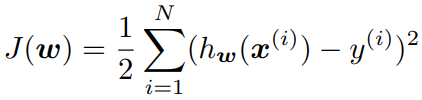

Salah satu metode optimasi yang umum digunakan adalah **gradient descent**, yang bekerja dengan memperbarui nilai \( w \) berdasarkan turunan dari fungsi loss.

**Aplikasi Linear Regression**

Linear regression sering digunakan dalam berbagai bidang seperti:
- Prediksi harga (misalnya harga rumah berdasarkan luas tanah, lokasi, dan fasilitas)
- Analisis tren (misalnya pertumbuhan pendapatan berdasarkan tahun)
- Model ekonomi dan keuangan

Teknik ini menjadi dasar dalam banyak model machine learning dan analisis data.

**Linear Regression dengan Scikit-learn**

Scikit-learn memiliki modul LinearRegression untuk membuat model linear regression. Di bawah ini adalah contoh implementasinya.

Pada percobaan kali ini, kita akan menggunakan data buatan yang terdiri dari 1 variabel dan 1 target. Hubungan antara variabel dan target dipenuhi oleh fungsi `y = 1+2X`. Nilai-nilai 1 dan 2, secara berurutan dapat dianggap sebagai nilai w0 dan w1.

Kita akan membuat dataset dengan 1 variabel independen (X) dan 1 target (y) yang mengikuti persamaan:

$y=3+2X$

Dalam hal ini:

$w_0 = 3$ adalah intersep

$w_1 = 2$ adalah koefisien regresi.

Mari kita buat dataset dengan sedikit noise untuk merepresentasikan data nyata, lalu melatih model linear regression.

In [3]:
import numpy as np

# Membuat data buatan dengan beberapa noises yang disengaja

# Membuat data buatan dengan noise
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
X_train = X.reshape(-1, 1) # Mengubah bentuk array agar sesuai dengan format Scikit-learn
y_train = np.array([5, 7, 10, 11, 13, 15, 17, 20, 21, 23])  # Mengikuti y = 3 + 2X dengan sedikit noise

print('X: ', X_train)
print('y: ', y_train)

X:  [[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
y:  [ 5  7 10 11 13 15 17 20 21 23]


In [4]:
# Melatih model linear regression menggunakan Scikit-learn pada training set

from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

Pada tahap ini, trained model 'linear' telah mengandung informasi (parameter-parameter) yang memenuhi suatu persamaan linear. Hal tersebut dapat kita lihat dengan cara di bawah ini.

In [5]:
# Menampilkan koefisien dan intersep dari model
print("Koefisien persamaan linear: ", linear.coef_)  # Harus mendekati 2
print("Intersep persamaan linear: ", linear.intercept_)  # Harus mendekati 3

Koefisien persamaan linear:  [2.]
Intersep persamaan linear:  3.1999999999999975


Berdasarkan persamaan linear tersebut, kita dapat membuat visualisasi linear hyperplane sederhana.

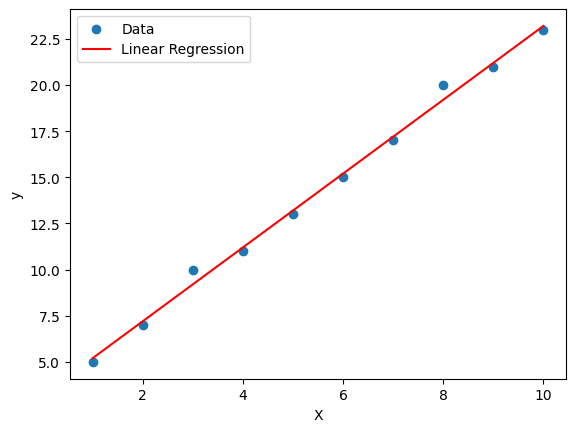

In [6]:
import matplotlib.pyplot as plt

plt.scatter(X, y_train, label="Data")
y_pred = linear.predict(X_train)

# Plot hyperplane
plt.plot(X, y_pred, color='red', label="Linear Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

# Show the plot
plt.show()

Coba memprediksi data baru.

In [7]:
# Prediksi dengan Data Baru
X_test = np.array([[2], [5], [8]])
y_test = np.array([7, 13, 19])  # Nilai sebenarnya sesuai dengan y = 3 + 2X

y_predict = linear.predict(X_test)
print("Hasil prediksi:", y_predict)

Hasil prediksi: [ 7.2 13.2 19.2]


Evaluasi performa model

In [8]:
from sklearn import metrics

# Nilai R-squared
print("R-squared:", metrics.r2_score(y_test, y_predict))

R-squared: 0.9983333333333333


Dengan R-squared sebesar 0.9983, model memiliki akurasi yang sangat tinggi dalam memprediksi hubungan antara X dan y. Nilai R-squared yang mendekati 1 menunjukkan bahwa model dapat menjelaskan 99.83% variabilitas data, sehingga **sangat baik dalam merepresentasikan hubungan linear ini**.

###Ridge and Lasso Regression

Linear regression adalah model yang memiliki ciri high-bias dan low-variance. Biasanya, model seperti ini cenderung tidak overfit. Walau demikian, linear regression masih dapat mengalami overfitting, apalagi pada data yang memiliki banyak fitur (high-dimension).

Untuk mengatasi hal tersebut, diperlukan regularisasi. Pada linear regression, regularisasi adalah teknik untuk meminimalkan fungsi loss dengan penambahan regularization term pada fungsi loss. Dua teknik regularisasi pada linear regression adalah Ridge dan Lasso. Berikut adalah modifikasi fungsi loss linear regression pada ridge dan lasso regression.

- Ridge regression

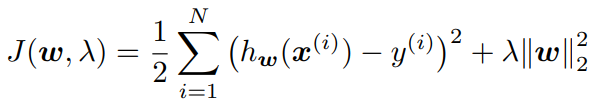

- Lasso Regression

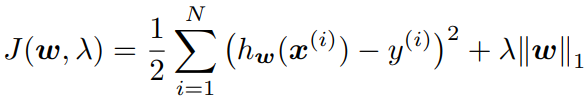

Term tambahan pada fungsi loss tersebut berperan seperti bobot pinalti untuk meminimalkan overfitting. Pada regularization term terdapat parameter λ yang pada sumber lain disebut sebagai α (alpha).

**Sumber gambar:** Slide kuliah "Linear Models for Regression and Classification" oleh Pak Adila A. Krisnadhi.

**Ridge dan Lasso Regression dengan Scikit-learn**

Berikut adalah contoh implementasi ridge dan lasso regression menggunakan modul scikit-learn pada dataset yang sebelumnya kita buat.

####Ridge

In [9]:
# Melatih model ridge regression menggunakan Scikit-learn pada training set

from sklearn.linear_model import Ridge

ridge = Ridge(alpha=2) # Mengatur hyperparameter alpha=2
ridge.fit(X_train, y_train)

Ridge(alpha=2)

Setelah pelatihan selesai, **ridge** memiliki parameter hasil generalisasi ridge regression dengan memanfaatkan bobot penalti. Parameter yang diperoleh dapat dilihat pada kode berikut ini.

In [10]:
# Melihat nilai koefisien dan intersep persamaan ridge regression pada trained model

print("Koefisien persamaan regresi ridge: \n", ridge.coef_)
print("Intersep persamaan regresi ridge: \n", ridge.intercept_)

Koefisien persamaan regresi ridge: 
 [1.95266272]
Intersep persamaan regresi ridge: 
 3.4603550295857985


Berdasarkan persamaan linear pada **ridge** regression tersebut, kita dapat membuat visualisasi linear hyperplane sederhana.

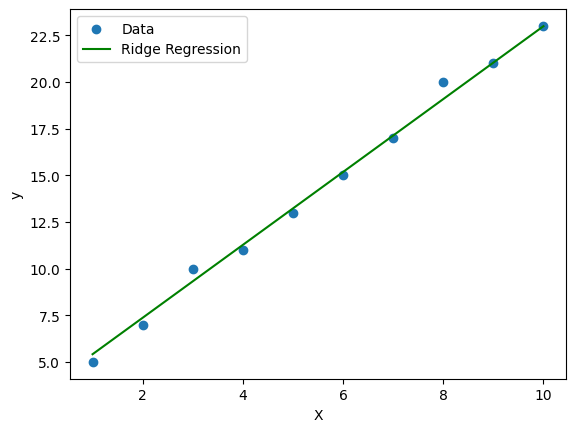

In [11]:
import matplotlib.pyplot as plt

plt.scatter(X, y_train, label="Data")
y_pred = ridge.predict(X_train)

# Plot hyperplane
plt.plot(X, y_pred, color='green', label="Ridge Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

# Show the plot
plt.show()

#### Lasso

Untuk **lasso** regression, berikut adalah contoh implementasinya.

In [12]:
# Melatih model lasso regression menggunakan Scikit-learn pada training set

from sklearn.linear_model import Lasso

lasso = Lasso(alpha=2) # Mengatur hyperparameter alpha=2
lasso.fit(X_train, y_train)

Lasso(alpha=2)

Setelah pelatihan selesai, **lasso** memiliki parameter hasil generalisasi lasso regression dengan memanfaatkan bobot penalti. Parameter yang diperoleh dapat dilihat pada kode berikut ini.

In [13]:
# Melihat nilai koefisien dan intersep persamaan lasso regression pada trained model

print("Koefisien persamaan regresi lasso: \n", lasso.coef_)
print("Intersep persamaan regresi lasso: \n", lasso.intercept_)

Koefisien persamaan regresi lasso: 
 [1.75757576]
Intersep persamaan regresi lasso: 
 4.533333333333333


Berdasarkan persamaan linear pada lasso regression tersebut, kita dapat membuat visualisasi linear hyperplane sederhana.

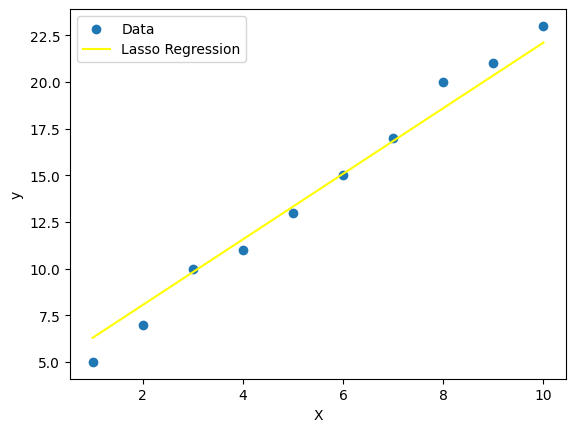

In [14]:
import matplotlib.pyplot as plt

plt.scatter(X, y_train, label="Data")
y_pred = lasso.predict(X_train)

# Plot hyperplane
plt.plot(X, y_pred, color='yellow', label="Lasso Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

# Show the plot
plt.show()

#### Perbandingan Linear, Ridge, Lasso Regression

Perhatikan plot visualisasi pada ketiga plot berikut ini. Seperti yang sudah disebutkan sebelumnya, model regresi linear memiliki kecenderungan untuk tidak overfit. Untuk itu, penerapan regularisasi melalui bobot penalti tidak memperbaik kinerja dari model pada konteks data sederhana yang kita bentuk.

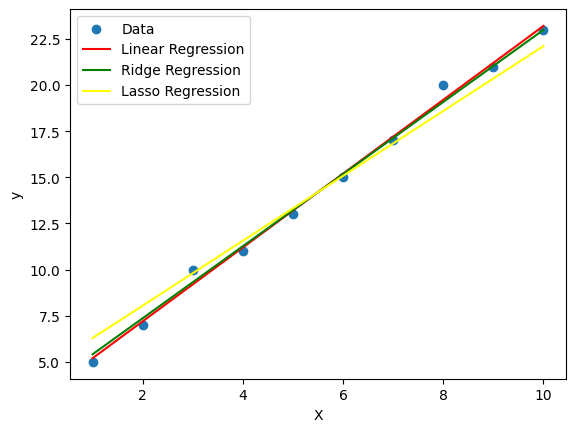

In [15]:
import matplotlib.pyplot as plt

plt.scatter(X, y_train, label="Data")
y_pred_linear = linear.predict(X_train)
y_pred_ridge = ridge.predict(X_train)
y_pred_lasso = lasso.predict(X_train)

# Plot hyperplane
plt.plot(X, y_pred_linear, color='red', label="Linear Regression")
plt.plot(X, y_pred_ridge, color='green', label="Ridge Regression")
plt.plot(X, y_pred_lasso, color='yellow', label="Lasso Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

# Show the plot
plt.show()

**NOTE**: Parameter alpha adalah parameter yang merepresentasikan “kekuatan” dari regularisasi yang dilakukan oleh model. Regularisasi adalah teknik modifikasi yang digunakan untuk mengurangi *generalization error*, dengan kata lain menghindari *overfitting*. Hal ini dilakukan dengan memberikan batasan/*constraint* atau penambahan penalti pada parameter/atribut yang kita gunakan. Untuk lebih jelas, silahkan baca dokumentasi model Ridge dan Lasso yang ada pada link berikut : [API Reference — scikit-learn 1.0.1 documentation ](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model)

Anda dipersilakan untuk mencoba sendiri memprediksi dan mengukur performa model ridge dan lasso regression. Performa mungkin tidak akan jauh berbeda dengan linear regression karena hanya mengunakan data yang sangat kecil. Untuk implementasi lebih lanjutnya menggunakan **sklearn** dapat dilihat pada kedua link berikut:
* [Lasso Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html).
* [Ridge Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

### Penjelasan Dataset untuk *Linear Regression, Lasso Regression, dan Ridge Regression*

Dataset ini berisi sembilan pengukuran morfometrik dari 104 ekor possum gunung brushtail yang ditangkap di tujuh lokasi dari Victoria Selatan hingga Queensland tengah.

**Fitur dalam dataset:**  
1. **case**: Nomor unik yang mengidentifikasi setiap possum.  
2. **site**: Lokasi tempat possum ditangkap, dikodekan sebagai angka.  
3. **Pop**: Populasi possum berdasarkan wilayah geografisnya.  
4. **sex**: Jenis kelamin possum (m untuk jantan, f untuk betina).  
5. **age**: Usia possum dalam tahun.  
6. **hdlngth**: Panjang kepala possum dalam milimeter.  
7. **skullw**: Lebar tengkorak possum dalam milimeter.  
8. **totlngth**: Panjang total possum dari kepala hingga ujung ekor dalam milimeter.  
9. **taill**: Panjang ekor possum dalam sentimeter.  
10. **footlgth**: Panjang kaki possum dalam milimeter.  
11. **earconch**: Panjang concha telinga possum dalam milimeter.  
12. **eye**: Lebar mata possum dalam milimeter.  
13. **chest**: Lingkar dada possum dalam sentimeter.  
14. **belly**: Lingkar perut possum dalam sentimeter.  

**Target variabel:**

* **hdlngth**: Panjang kepala possum dalam milimeter.

**Sumber data dan penjelasan:**  
https://www.kaggle.com/datasets/abrambeyer/openintro-possum

In [16]:
# Import dataset diamonds dan menampilkan 5 row teratas
import pandas as pd

df_possum = pd.read_csv('possum.csv')
df_possum.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [17]:
# Menampilkan informasi keseluruhan terkait dataset
df_possum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


#### Soal 1: Data Preprocessing untuk Regresi

a) Persiapkan data untuk dilatih oleh model regresi. Pada tahap ini, Anda diminta melakukan persiapan sebelum melakukan training pada model. Berikut adalah persiapan yang setidaknya dilakukan sebagai berikut:

* Handle missing values dan duplikat data
* Melakukan encoding pada data kategorikal
* Membagi dataset menjadi training dan testing dengan ukuran 80% training dan 20% testing.
* Melakukan standarisasi pada dataset. Hint: Standarisasi dilatih terlebih dahulu pada data training, lalu lakukan standarisasi untuk kedua training dan testing set.

#### Jawaban Soal 1 - Handle missing values dan duplikat

In [ ]:
file_path = 'possum.csv'
df_possum = pd.read_csv(file_path)

missing_values_before = df_possum.isnull().sum()
duplicates_before = df_possum.duplicated().sum()

total_missing_before = df_possum.isnull().sum().sum()
total_duplicates_before = df_possum.duplicated().sum()

df_possum_clean = df_possum.dropna()

df_possum_clean = df_possum_clean.drop_duplicates()

missing_values_after = df_possum_clean.isnull().sum()
duplicates_after = df_possum_clean.duplicated().sum()

total_missing_after = df_possum_clean.isnull().sum().sum()
total_duplicates_after = df_possum_clean.duplicated().sum()

print(f"Jumlah missing values sebelum cleaning: {total_missing_before}")
print(f"Jumlah duplikat data sebelum cleaning: {total_duplicates_before}")
print(f"\nJumlah missing values setelah cleaning: {total_missing_after}")
print(f"Jumlah duplikat data setelah cleaning: {total_duplicates_after}")

df_possum_clean.head()


Jumlah missing values sebelum cleaning: 3
Jumlah duplikat data sebelum cleaning: 0

Jumlah missing values setelah cleaning: 0
Jumlah duplikat data setelah cleaning: 0


,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


#### Jawaban Soal 1 - Melakukan encoding pada data kategorikal

In [19]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()

df_possum_clean['sex'] = label_encoder.fit_transform(df_possum_clean['sex'])
df_possum_clean['Pop'] = label_encoder.fit_transform(df_possum_clean['Pop'])
df_possum_clean.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,0,1,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,0,0,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,0,0,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,0,0,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,0,0,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


#### Jawaban Soal 1 - Membagi dataset menjadi training dan testing dengan ukuran 80% training dan 20% testing.

In [20]:
from sklearn.model_selection import train_test_split
X = df_possum_clean.drop('case', axis=1)
y = df_possum_clean['case']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
92,7,1,1,3.0,89.2,54.0,82.0,38.0,63.8,44.9,12.8,24.0,31.0
26,1,0,0,2.0,90.5,54.5,85.0,35.0,70.3,50.8,14.2,23.0,28.0
44,2,0,1,3.0,90.7,55.9,81.0,34.0,71.5,54.0,14.6,27.0,31.5
73,6,1,0,4.0,88.7,52.0,83.0,38.0,61.5,45.9,14.7,26.0,34.0
15,1,0,1,4.0,91.6,56.0,86.0,34.5,73.0,51.4,14.4,28.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,5,1,0,3.0,96.9,56.5,89.5,38.5,63.0,45.1,17.1,25.5,33.0
74,6,1,1,6.0,93.8,58.1,89.0,38.0,66.2,45.6,16.9,26.0,33.5
14,1,0,1,5.0,92.9,57.6,85.5,34.0,69.7,51.8,15.7,28.0,35.0
95,7,1,1,4.0,94.8,55.7,83.0,38.0,66.5,47.7,14.0,25.0,33.0


#### Jawaban Soal 1 - Melakukan standarisasi pada dataset. Hint: Standarisasi dilatih terlebih dahulu pada data training, lalu lakukan standarisasi untuk kedua training dan testing set.

In [164]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

possum_data = pd.read_csv('possum.csv')

features = possum_data.drop(columns=['case', 'sex', 'site', 'Pop'])
target = possum_data['age']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)


#### Soal 2: Linear Regression

a) Buatlah sebuah model regresi linear berdasarkan fitur-fitur yang terpilih sebelumnya dengan `hdlngth` sebagai target prediksi. Tampilkan hasil prediksi pada keseluruhan data uji.

In [165]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df_possum_clean[['age', 'skullw', 'totlngth', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly']]
y = df_possum_clean['hdlngth']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

print(predictions_df.head())

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


    Actual  Predicted
87    89.6  93.142617
58   102.5  98.146919
69    91.9  92.010074
70    92.8  93.957045
48    95.4  94.321860
Mean Squared Error: 3.655074911031752
R-squared: 0.7210571429966977


b) Visualisasikan kinerja model regresi linear yang sudah dipilih sebelumnya pada keseluruhan data uji. Hint: dapat memanfaatkan visualisasi perbandingan hasil prediksi dengan aktual (Prediction Error Plot) atau dapat memanfaatkan Residuals Plot!

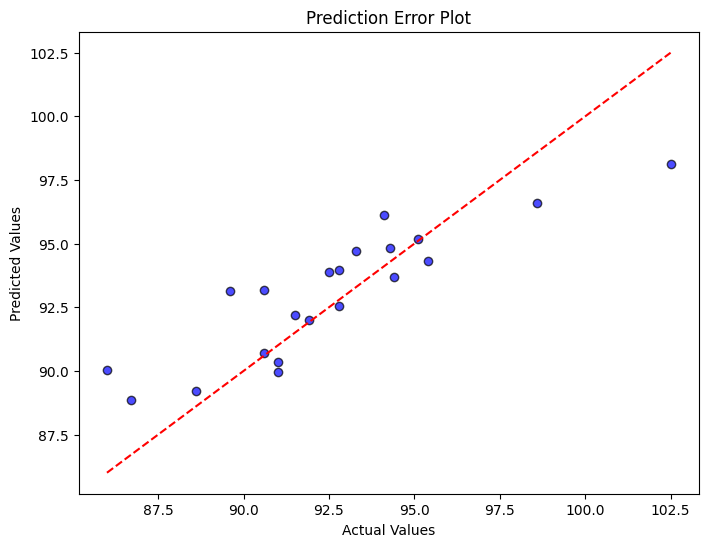

In [167]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Prediction Error Plot')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

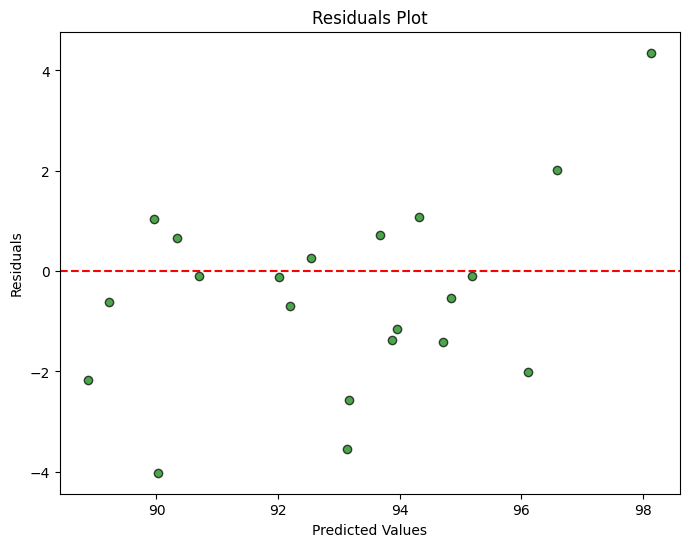

In [24]:
# Calculate residuals
residuals = y_test - y_pred

# Create the Residuals Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='green', edgecolor='k', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


c) Tampilkan nilai dari R squared yang dihasilkan dengan menggunakan **cross validation** untuk mendapatkan performa kinerja sebenarnya menggunakan data latih yang ada.

> Catatan: Jumlah split dibebaskan.

In [168]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np

model = LinearRegression()

cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

average_r2 = np.mean(cv_scores)

print("Cross-validation R² scores for each fold:")
for i, score in enumerate(cv_scores, 1):
    print(f"Fold {i}: {score:.4f}")

print(f"\nAverage R² score across all folds: {average_r2:.4f}")


Cross-validation R² scores for each fold:
Fold 1: 0.6060
Fold 2: -1.2852
Fold 3: 0.5969
Fold 4: 0.2527
Fold 5: 0.3143

Average R² score across all folds: 0.0970


#### Soal 3: Lasso Regression

Ikuti langkah-langkah di bawah ini. **Gunakan training dan testing set yang sama dengan Linear Regression**.

a) Buatlah sebuah list alpha yang berisi minimal 5 buah alpha.

In [ ]:
alpha_values = [0.1, 1, 10, 50, 100]

print("List of alpha values:", alpha_values)

List of alpha values: [0.1, 1, 10, 50, 100]


b) Buatlah (fit) model regresi lasso berdasarkan fitur-fitur yang terpilih di awal sebanyak nilai alpha yang telah ditentukan.

In [170]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

alpha_values = [0.1, 1, 10, 50, 100]
r2_scores = []

for alpha in alpha_values:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    y_pred = lasso_model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)
    
    print(f"Alpha = {alpha}: R² = {r2:.4f}") 
print("\nR² scores for all alpha values:")
for i, score in enumerate(r2_scores):
    print(f"Alpha {alpha_values[i]}: R² = {score:.4f}")

Alpha = 0.1: R² = 0.7131
Alpha = 1: R² = 0.6728
Alpha = 10: R² = 0.0029
Alpha = 50: R² = -0.0045
Alpha = 100: R² = -0.0045

R² scores for all alpha values:
Alpha 0.1: R² = 0.7131
Alpha 1: R² = 0.6728
Alpha 10: R² = 0.0029
Alpha 50: R² = -0.0045
Alpha 100: R² = -0.0045


c) Tampilkan nilai MAE, MSE, RMSE, dan R-squared untuk masing-masing model lasso regression pada testing set

In [171]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

alpha_values = [0.1, 1, 10, 50, 100]

metrics = []

for alpha in alpha_values:
    lasso_model = Lasso(alpha=alpha)
    
    lasso_model.fit(X_train, y_train)
    
    y_pred = lasso_model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = lasso_model.score(X_test, y_test)
    
    metrics.append((alpha, mae, mse, rmse, r2))
    
    print(f"Alpha = {alpha}:")
    print(f"  MAE = {mae:.4f}")
    print(f"  MSE = {mse:.4f}")
    print(f"  RMSE = {rmse:.4f}")
    print(f"  R² = {r2:.4f}")
    print()

print("\nMetrics for all alpha values:")
for alpha, mae, mse, rmse, r2 in metrics:
    print(f"Alpha {alpha}: MAE = {mae:.4f}, MSE = {mse:.4f}, RMSE = {rmse:.4f}, R² = {r2:.4f}")


Alpha = 0.1:
  MAE = 1.5038
  MSE = 3.7588
  RMSE = 1.9388
  R² = 0.7131

Alpha = 1:
  MAE = 1.5881
  MSE = 4.2869
  RMSE = 2.0705
  R² = 0.6728

Alpha = 10:
  MAE = 2.6586
  MSE = 13.0659
  RMSE = 3.6147
  R² = 0.0029

Alpha = 50:
  MAE = 2.6705
  MSE = 13.1624
  RMSE = 3.6280
  R² = -0.0045

Alpha = 100:
  MAE = 2.6705
  MSE = 13.1624
  RMSE = 3.6280
  R² = -0.0045


Metrics for all alpha values:
Alpha 0.1: MAE = 1.5038, MSE = 3.7588, RMSE = 1.9388, R² = 0.7131
Alpha 1: MAE = 1.5881, MSE = 4.2869, RMSE = 2.0705, R² = 0.6728
Alpha 10: MAE = 2.6586, MSE = 13.0659, RMSE = 3.6147, R² = 0.0029
Alpha 50: MAE = 2.6705, MSE = 13.1624, RMSE = 3.6280, R² = -0.0045
Alpha 100: MAE = 2.6705, MSE = 13.1624, RMSE = 3.6280, R² = -0.0045


d) Pilih model terbaik berdasarkan nilai R-squared yang ditampilkan.

In [186]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

# Define the list of alpha values
alpha_values = [0.1, 1, 10, 50, 100]

# Initialize variables to track the best model
best_alpha = None
best_r2 = -float('inf')

# Fit and evaluate Lasso Regression for each alpha value
for alpha in alpha_values:
    # Initialize and fit the Lasso model
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = lasso_model.predict(X_test)
    
    # Calculate the R² score
    r2 = r2_score(y_test, y_pred)
    
    # Track the best R² score and corresponding alpha value
    if r2 > best_r2:
        best_r2 = r2
        best_alpha = alpha

# Display the best alpha and its R² score
print(f"The best model is for Alpha = {best_alpha} with an R² of {best_r2:.4f}")

# Display the best model output in the cell
best_model

The best model is for Alpha = 0.1 with an R² of 0.7131


LinearRegression()

e) Tampilkan array hasil prediksi dari model regresi lasso yang terpilih pada keseluruhan data uji.

In [ ]:
from sklearn.linear_model import Lasso

best_lasso_model = Lasso(alpha=best_alpha)
best_lasso_model.fit(X_train, y_train)

y_pred = best_lasso_model.predict(X_test)

print("Predictions array:")
print(y_pred)

Predictions array:
[93.06904249 98.06515299 92.11287799 93.97144002 94.13595405 90.46973063
 93.81697013 96.13391733 94.66702921 96.05132779 93.51006606 92.63168
 89.67205536 90.87660878 92.92148219 92.27403302 90.11510976 89.95829337
 95.02594404 94.91437654 89.06122686]


f) Visualisasikan kinerja model regresi lasso yang sudah dipilih sebelumnya pada keseluruhan data uji. Hint: dapat memanfaatkan visualisasi perbandingan hasil prediksi dengan aktual (Prediction Error Plot) atau dapat memanfaatkan Residuals Plot!

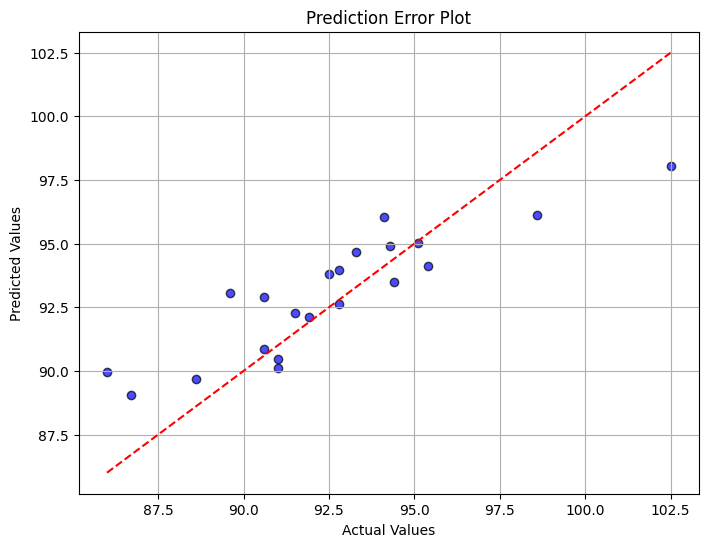

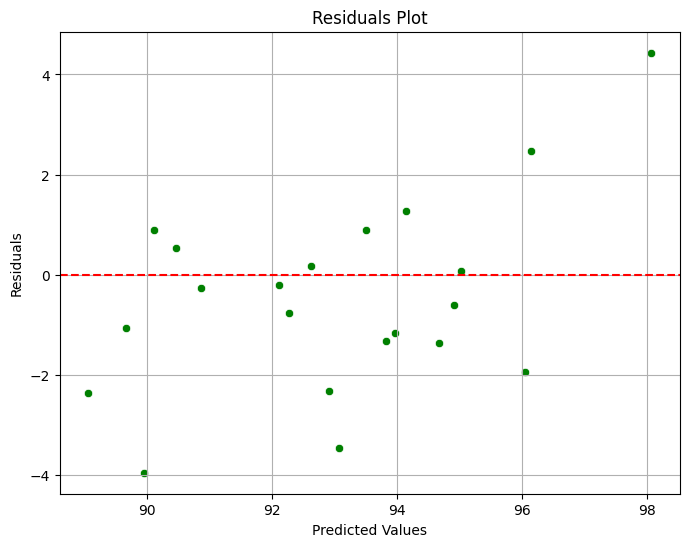

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the Prediction Error Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Prediction Error Plot')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

# Calculate residuals
residuals = y_test - y_pred

# Create the Residuals Plot (without lowess)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, color='green')
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y = 0
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# Disclaimer: jika error, perlu run: "pip install statsmodels" terlebih dahulu
# Disclaimer: jika error, perlu run: "pip install statsmodels" terlebih dahulu
# Disclaimer: jika error, perlu run: "pip install statsmodels" terlebih dahulu

g) Berikan analisis hubungan perubahan nilai parameter alpha dengan kualitas hasil regresi berdasarkan nilai R-squared

`JAWABAN`

Perubahan nilai parameter alpha pada Lasso Regression mempengaruhi kualitas hasil regresi yang diukur melalui nilai R-squared (R²). Alpha berfungsi sebagai parameter regularisasi yang mengontrol kekuatan penalti terhadap koefisien regresi. Alpha kecil (misalnya 0.1) cenderung menghasilkan model yang lebih mirip dengan regresi linier biasa, dengan R² yang lebih tinggi, karena model tidak terlalu dibatasi oleh regularisasi dan bisa lebih bebas untuk menyesuaikan data. Alpha besar (misalnya 100) meningkatkan regularisasi, yang dapat mengurangi overfitting, tetapi juga bisa menurunkan R² karena model lebih terhambat dalam menyesuaikan data.

#### Soal 4: Ridge Regression

Ikuti langkah-langkah di bawah ini. **Gunakan training dan testing set yang sama dengan Linear Regression**.

a) Buatlah sebuah list alpha yang berisi minimal 5 buah alpha.

In [45]:
# List alpha yang berisi 5 nilai alpha
alpha_values = [0.1, 1, 10, 50, 100]

# Tampilkan list alpha untuk verifikasi
print("List alpha values:", alpha_values)

List alpha values: [0.1, 1, 10, 50, 100]


b) Buatlah (fit) model regresi ridge berdasarkan fitur-fitur yang terpilih di awal sebanyak nilai alpha yang telah ditentukan.

In [46]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

# List alpha yang berisi nilai-nilai alpha yang akan diuji
alpha_values = [0.1, 1, 10, 50, 100]
for alpha in alpha_values:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    y_pred = ridge_model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f"Alpha = {alpha}: R² = {r2:.4f}")

Alpha = 0.1: R² = 0.7211
Alpha = 1: R² = 0.7211
Alpha = 10: R² = 0.7214
Alpha = 50: R² = 0.7171
Alpha = 100: R² = 0.7084


c) Tampilkan nilai MAE, MSE, RMSE, dan R-squared untuk masing-masing model ridge regression pada testing set

In [47]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

alpha_values = [0.1, 1, 10, 50, 100]

for alpha in alpha_values:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    y_pred = ridge_model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = ridge_model.score(X_test, y_test)
    
    print(f"Alpha = {alpha}:")
    print(f"  MAE = {mae:.4f}")
    print(f"  MSE = {mse:.4f}")
    print(f"  RMSE = {rmse:.4f}")
    print(f"  R² = {r2:.4f}")
    print()

Alpha = 0.1:
  MAE = 1.4552
  MSE = 3.6550
  RMSE = 1.9118
  R² = 0.7211

Alpha = 1:
  MAE = 1.4564
  MSE = 3.6539
  RMSE = 1.9115
  R² = 0.7211

Alpha = 10:
  MAE = 1.4670
  MSE = 3.6505
  RMSE = 1.9106
  R² = 0.7214

Alpha = 50:
  MAE = 1.5127
  MSE = 3.7068
  RMSE = 1.9253
  R² = 0.7171

Alpha = 100:
  MAE = 1.5502
  MSE = 3.8216
  RMSE = 1.9549
  R² = 0.7084



d) Pilih model terbaik berdasarkan nilai R-squared yang ditampilkan.

In [48]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

alpha_values = [0.1, 1, 10, 50, 100]

# Display the base model with alpha = 0.1
base_model = Ridge(alpha=alpha_values[0])
base_model  # This will display the base model in a separate output box

# Initialize variables to track the best model
best_alpha = None
best_r2 = -float('inf')

# Fit and evaluate Ridge Regression for each alpha in alpha_values
for alpha in alpha_values:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    y_pred = ridge_model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    if r2 > best_r2:
        best_r2 = r2
        best_alpha = alpha
    
    print(f"Alpha = {alpha}:")
    print(f"  MAE = {mae:.4f}")
    print(f"  MSE = {mse:.4f}")
    print(f"  RMSE = {rmse:.4f}")
    print(f"  R² = {r2:.4f}")
    print()

# Display the best model based on R²
best_ridge_model = Ridge(alpha=best_alpha)
best_ridge_model.fit(X_train, y_train)
best_ridge_model  # This will display the best model in a separate output box


Alpha = 0.1:
  MAE = 1.4552
  MSE = 3.6550
  RMSE = 1.9118
  R² = 0.7211

Alpha = 1:
  MAE = 1.4564
  MSE = 3.6539
  RMSE = 1.9115
  R² = 0.7211

Alpha = 10:
  MAE = 1.4670
  MSE = 3.6505
  RMSE = 1.9106
  R² = 0.7214

Alpha = 50:
  MAE = 1.5127
  MSE = 3.7068
  RMSE = 1.9253
  R² = 0.7171

Alpha = 100:
  MAE = 1.5502
  MSE = 3.8216
  RMSE = 1.9549
  R² = 0.7084



Ridge(alpha=10)

e) Tampilkan array hasil prediksi dari model regresi ridge yang terpilih pada keseluruhan data uji.

In [49]:
# Inisialisasi model Ridge dengan alpha terbaik yang dipilih
best_ridge_model = Ridge(alpha=best_alpha)

# Latih model menggunakan data training
best_ridge_model.fit(X_train, y_train)

# Prediksi pada data testing
y_pred_best = best_ridge_model.predict(X_test)

# Tampilkan array hasil prediksi
print("Predictions array from the best Ridge model:")
print(y_pred_best)

Predictions array from the best Ridge model:
[93.09380405 98.17978802 92.13317139 94.00043251 94.29041668 90.4257147
 93.85207454 96.4321714  94.81260727 96.11131188 93.64292811 92.54260391
 89.3066493  90.74191145 93.08035574 92.1944037  89.99289831 89.99808172
 95.13384569 94.87750542 88.87821008]


f) Visualisasikan kinerja model regresi ridge yang sudah dipilih sebelumnya pada keseluruhan data uji. Hint: dapat memanfaatkan visualisasi perbandingan hasil prediksi dengan aktual (Prediction Error Plot) atau dapat memanfaatkan Residuals Plot!

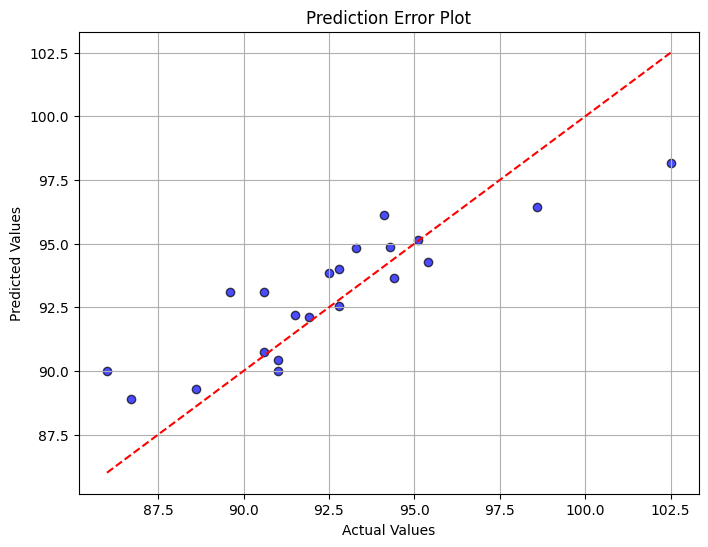

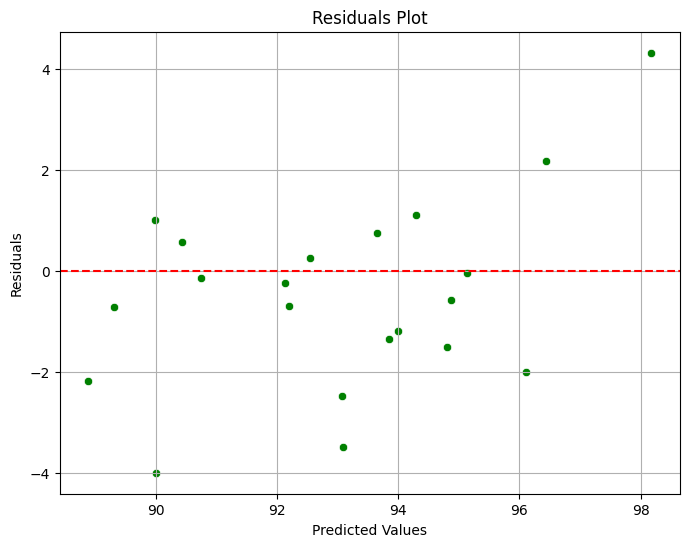

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prediksi menggunakan model Ridge terbaik
y_pred_best = best_ridge_model.predict(X_test)

# 1. Prediction Error Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_best, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Prediction Error Plot')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

# 2. Residuals Plot
residuals = y_test - y_pred_best

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_best, y=residuals, color='green')
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y = 0
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

g) Jelaskan mengapa lasso regression dapat dijadikan model untuk feature selection, sedangkan ridge regression tidak?

`JAWABAN`

Lasso Regression dapat digunakan untuk feature selection karena penalti L1-nya yang mendorong koefisien beberapa fitur menjadi nol, sehingga fitur-fitur yang tidak relevan secara otomatis dihapus. Sebaliknya, Ridge Regression menggunakan penalti L2 yang hanya memperkecil koefisien tanpa mengubahnya menjadi nol, sehingga semua fitur tetap digunakan, meskipun dengan kontribusi yang lebih kecil. Dengan demikian, Lasso efektif dalam memilih fitur yang penting, sementara Ridge tidak.

### Logistic Regression

Logistic regression adalah model linear yang hanya memiliki dua nilai output: 0 atau 1. Oleh karena itu logistic regression lebih cocok dianggap sebagai classifier daripada regressor. Contoh visualisasinya adalah sebagai berikut.

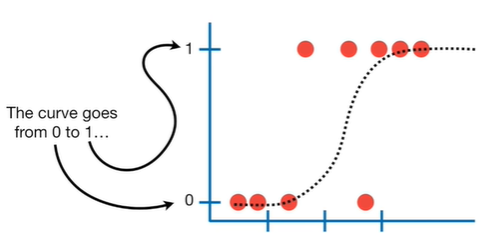

Sumber: https://youtu.be/yIYKR4sgzI8?t=222

Untuk mendapatkan kurva seperti pada gambar, berikut adalah persamaan logistic regression yang memenuhi.

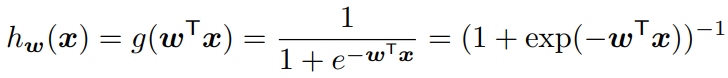

Berbeda dengan model linear, ridge, dan lasso regression yang meminimalkan fungsi loss. Pada logistic regression dilakukan proses memaksimalkan fungsi likelihood untuk menemukan parameter yang cocok dengan data.

Hal ini karena logistic regression merupakan metode klasifikasi. Sehingga, alih-alih meminimalkan perbedaan hasil prediksi, di sini memaksimalkan persamaan hasil prediksi dengan aktual.

Fungsi/persamaan likelihood dimaksimalkan melalui proses yang disebut dengan gradient ascent (tentunya bisa dipelajari sendiri dari slide :D). Berikut adalah persamaan likelihood tersebut.

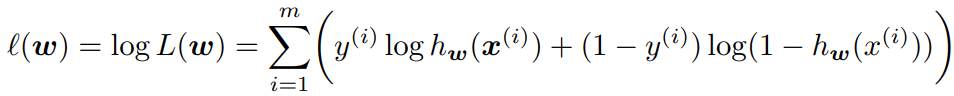

**Sumber gambar (persamaan) dan penjelasan lebih detail:** Slide kuliah "Linear Models for Regression and Classification" oleh Pak Adila A. Krisnadhi.

Untuk implementasi Logistic Regression menggunakan **sklearn** lebih lanjutnya dapat dilihat pada link [berikut](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

**Logistic regression** dengan Scikit-learn

Pada bagian ini kita melatih model logistic regression menggunakan modul dari scikit-learn. Kita dapat membentuk data buatan sederhana dan melihat decision boundary yang dihasilkan. Kali ini target hanya berisi nilai 0 atau 1.

In [51]:
# Membentuk data buatan
x1  = np.array([ 1,  2,  3,  4,  6,  7,  8,  9, 10, 11])
x2  = np.array([ 2,  3,  4,  7,  7,  8,  9,  6,  5,  9])

X_train = np.stack((x1, x2), axis=1)
y_logistic_train = np.array([0, 0, 0, 1, 1, 1, 1, 0, 0, 1])

print('X: ', X_train)
print('y: ', y_logistic_train)

X:  [[ 1  2]
 [ 2  3]
 [ 3  4]
 [ 4  7]
 [ 6  7]
 [ 7  8]
 [ 8  9]
 [ 9  6]
 [10  5]
 [11  9]]
y:  [0 0 0 1 1 1 1 0 0 1]


In [52]:
# Melatih model logistic regression menggunakan Scikit-learn pada training set

from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(X_train, y_logistic_train)

LogisticRegression()

Selanjutnya, mari kita coba memprediksi nilai target dari data yang baru.

In [53]:
# Melakukan percobaan prediksi model logistic regression menggunakan data testing buatan

X_test = np.array([[ 4,  5],
                   [ 4,  5]])
y_test = np.array([0, 1])

y_logistic_predict = logistic.predict(X_test)

print(y_logistic_predict)

[0 0]


Selanjutnya, kita dapat melihat decision boundary yang dihasilkan oleh model tersebut.

In [54]:
# Mendapatkan intercept dan koefisien sebagai w0, w1, dan w2
logistic.intercept_, logistic.coef_
weights = [logistic.intercept_[0],logistic.coef_[0,0], logistic.coef_[0,1]]
print(weights)

[np.float64(-6.538487138561528), np.float64(-0.2801041590193816), np.float64(1.3565489526055023)]


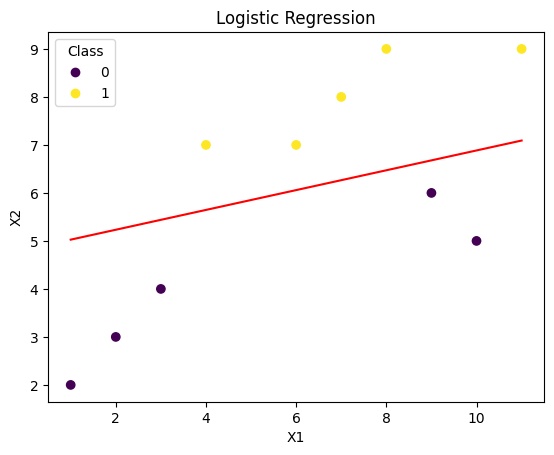

In [55]:
# Plotting the decision boundary
x2_test = (-weights[0] - (weights[1] * x1)) / weights[2]
plt.title('Logistic Regression')
plt.xlabel('X1')
plt.ylabel('X2')
scatter = plt.scatter(x1, x2, c=y_logistic_train, cmap='viridis')
plt.legend(*scatter.legend_elements(),
           loc = 'upper left',
           title = 'Class')
plt.plot(x1, x2_test, color='red', label='Decision Boundary')
plt.show()

Untuk mengevaluasi performa logistic regression, tentunya berbeda dengan linear, ridge, maupun lasso regression. Hasil prediksi model logistic regression dievaluasi selayaknya model klasifikasi. Contohnya dengan akurasi.

Melihat hasil prediksi di atas, kita dapat tahu bahwa model hanya berhasil memprediksi benar sebanyak satu saja. Oleh karena itu, nilai akurasi model logistic regression yang telah kita latih adalah sebesar 0.5.

In [56]:
# Menampilkan rata-rata akurasi
print("Nilai rata-rata akurasi:", logistic.score(X_test, y_test))

Nilai rata-rata akurasi: 0.5


**Log Odds (Logit)**

Dalam regresi logistik sederhana, kita ingin memodelkan probabilitas suatu kejadian, biasanya dilambangkan dengan Y=1. Namun, probabilitas hanya bisa bernilai antara 0 dan 1, sedangkan model linear (seperti yang digunakan di sisi kanan persamaan regresi logistik) bisa menghasilkan nilai dari negatif tak hingga hingga positif tak hingga. Untuk menjembatani perbedaan ini, kita menggunakan fungsi logit.

Persamaan regresi logistik sederhana adalah:

$$logit[P(Y=1)] = β_0 + β_1 * X + error$$

* **P(Y=1)**: Probabilitas bahwa variabel Y bernilai 1.
* **β₀**: Intersep (konstanta).
* **β₁**: Koefisien slope.
* **X**: Variabel independen.
* **logit[P(Y=1)]**: Log odds dari P(Y=1).

Berikut adalah penjelasan tentang bagaimana koefisien mempengaruhi prediksi:

**1. Intercept (β₀ = -6.5385) Sangat Negatif**

  * Jika $x1$ dan $x2$ kecil (atau nol), nilai logit menjadi sangat negatif.
  * Artinya, probabilitas p mendekati nol, sehingga prediksi cenderung 0 (kejadian negatif).

**2. Koefisien β₁ = -0.2801 (Efek Negatif pada $x1$)**

  * Jika $x1$ meningkat, log-odds menurun.
  * Ini berarti **probabilitas kejadian positif menurun** → lebih mungkin memprediksi **kelas 0**.
  * Dampaknya relatif kecil karena nilai absolutnya tidak besar.

**3. Koefisien β₂ = 1.3565 (Efek Positif pada z2)**

  * Jika $x2$ meningkat, log-odds bertambah.
  * Ini berarti **probabilitas kejadian positif meningkat** → lebih mungkin memprediksi **kelas 1**.
  * Pengaruhnya cukup besar karena nilainya positif dan lebih besar dari β₁.

**Apa itu Odds?**

Odds adalah rasio probabilitas kejadian Y=1 terhadap probabilitas kejadian Y=0. Secara matematis:

$$Odds = \frac{P(Y=1)}{P(Y=0)}$$

Contoh: Jika probabilitas Y=1 adalah 0.8, maka probabilitas Y=0 adalah 1 - 0.8 = 0.2. Odds-nya adalah:

$$Odds = \frac{0.8}{0.2} = 4$$

Ini sering diungkapkan sebagai odds 4:1, yang berarti kejadian Y=1 empat kali lebih mungkin terjadi daripada kejadian Y=0.

**Apa itu Log Odds (Logit)?**

Log odds (logit) adalah logaritma natural (Ln) dari odds. Secara matematis:

$$Log odds = Ln(Odds) = Ln\left(\frac{P(Y=1)}{P(Y=0)}\right) = Ln\left(\frac{P(Y=1)}{1-P(Y=1)}\right)$$

**Mengapa Kita Menggunakan Log Odds?**

* **Transformasi Skala**: Log odds mengubah skala probabilitas (0 hingga 1) menjadi skala yang berkisar dari negatif tak hingga hingga positif tak hingga. Ini memungkinkan kita untuk menggunakan model linear untuk memodelkan probabilitas.
* **Menghubungkan Model Linear dengan Probabilitas**: Logit berfungsi sebagai fungsi penghubung (link function) antara nilai yang dihasilkan oleh sisi kanan model linear dan rentang nilai probabilitas.

**Proses Transformasi Skala:**

1.  **Probabilitas**: Nilai antara 0 dan 1.
2.  **Odds**: Nilai dari 0 hingga positif tak hingga.
3.  **Log Odds (Logit)**: Nilai dari negatif tak hingga hingga positif tak hingga.

Dengan menggunakan log odds, kita dapat memodelkan probabilitas kejadian Y=1 menggunakan model linear, yang memungkinkan kita untuk menganalisis hubungan antara variabel independen X dan probabilitas kejadian tersebut.

Untuk penjelasan lebih detail bisa lihat disini:
* https://www.statsmodels.org/stable/generated/statsmodels.discrete.discrete_model.MNLogit.html
* https://www.statsmodels.org/stable/generated/statsmodels.formula.api.logit.html
* https://heds.nz/posts/logistic-regression-python/
* https://www.pythonfordatascience.org/logistic-regression-python/

Berikut contoh penggunaan statsmodels untuk membantu kita menganalisis log odds.

In [57]:
import statsmodels.formula.api as smf

# Membentuk DataFrame untuk smf.logit
df = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y_logistic_train})

# Membuat model logistik menggunakan statsmodels
reg = smf.logit("y ~ x1 + x2", data=df).fit()

# Menampilkan ringkasan model
print(reg.summary())

         Current function value: 0.000000
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   10
Model:                          Logit   Df Residuals:                        7
Method:                           MLE   Df Model:                            2
Date:                Sat, 12 Apr 2025   Pseudo R-squ.:                   1.000
Time:                        05:26:53   Log-Likelihood:            -6.6247e-11
converged:                      False   LL-Null:                       -6.9315
Covariance Type:            nonrobust   LLR p-value:                 0.0009766
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -97.2926   5.04e+05     -0.000      1.000   -9.89e+05    9.89e+05
x1            -8.8473    1.9e+05  -4.66e-05      1.000   -3.72e+0

c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detect

Berikut adalah interpretasi dari hasil regresi logistik di atas:

1. **Intercept (β₀ = -97.2926) Sangat Negatif**  
   - Jika \( x1 \) dan \( x2 \) kecil (atau nol), logit menjadi sangat negatif.  
   - Artinya, probabilitas kejadian positif (\( y=1 \)) mendekati nol, sehingga prediksi cenderung ke kelas 0.  

2. **Koefisien \( β₁ = -8.8473 \) (Efek Negatif pada \( x1 \))**  
   - Jika \( x1 \) meningkat, log-odds menurun drastis.  
   - Ini berarti probabilitas kejadian positif menurun → lebih cenderung memprediksi kelas 0.  
   - Namun, nilai ini tidak dapat diinterpretasikan dengan baik karena standard error sangat besar.  

3. **Koefisien \( β₂ = 24.9756 \) (Efek Positif pada \( x2 \))**  
   - Jika \( x2 \) meningkat, log-odds bertambah besar.  
   - Ini berarti probabilitas kejadian positif meningkat → lebih cenderung memprediksi kelas 1.  
   - Namun, adanya separasi sempurna membuat nilai ini tidak dapat diandalkan.

In [58]:
# Menghitung odds ratio dan interval kepercayaan
odds_ratio = np.exp(reg.params)

# Menampilkan odds ratio dan interval kepercayaan
print("\nOdds Ratio:")
print(odds_ratio)


Odds Ratio:
Intercept    5.576218e-43
x1           1.437753e-04
x2           7.026754e+10
dtype: float64


- **$x1$ memiliki dampak negatif yang sangat kuat terhadap peluang kejadian positif.** Jika $x1$ meningkat, kemungkinan $y=1$ akan berkurang drastis.  
- **$x2$ memiliki dampak positif yang sangat besar terhadap peluang kejadian positif.** Jika $x2$ meningkat, kemungkinan $y=1$ akan meningkat sangat signifikan.  
- **Model mengalami separasi sempurna**, karena odds ratio sangat ekstrem ($x1$ sangat kecil, $x2$ sangat besar). Hal ini bisa menyebabkan **overfitting** dan hasil regresi tidak bisa diandalkan untuk prediksi generalisasi. Namun, untuk contoh ini data memang dibuat demikian agar lebih mudah dimengerti.

### Penjelasan Dataset untuk *Logistic Regression*

Dataset yang digunakan pada analisis prediksi penyakit Alzheimer adalah data kesehatan komprehensif dari 2.149 pasien, dengan informasi mendetail mengenai demografi, gaya hidup, riwayat medis, pengukuran klinis, penilaian kognitif dan fungsional, gejala, serta status diagnosis Alzheimer. Dataset ini ideal untuk mengeksplorasi faktor-faktor yang berhubungan dengan Alzheimer, mengembangkan model prediktif, dan melakukan analisis statistik.

**Fitur dalam dataset:**  
1. **PatientID**: Identifikasi unik setiap pasien (4751 hingga 6900).  
2. **Age**: Usia pasien (60 – 90 tahun).  
3. **Gender**: Jenis kelamin pasien, di mana 0 untuk Laki-laki dan 1 untuk Perempuan.  
4. **Ethnicity**: Etnisitas pasien, dengan kode: 0 = Caucasian, 1 = African American, 2 = Asian, 3 = Other.  
5. **EducationLevel**: Tingkat pendidikan pasien, dengan kode: 0 = None, 1 = High School, 2 = Bachelor's, 3 = Higher.  
6. **BMI**: Body Mass Index pasien, berkisar antara 15 hingga 40.  
7. **Smoking**: Status merokok, di mana 0 menunjukkan Tidak dan 1 menunjukkan Ya.  
8. **AlcoholConsumption**: Konsumsi alkohol mingguan dalam unit (0 – 20 unit).  
9. **PhysicalActivity**: Durasi aktivitas fisik mingguan (0 – 10 jam).  
10. **DietQuality**: Skor kualitas diet, berkisar antara 0 hingga 10.  
11. **SleepQuality**: Skor kualitas tidur, berkisar antara 4 hingga 10.  
12. **FamilyHistoryAlzheimers**: Riwayat keluarga dengan Alzheimer, di mana 0 = Tidak dan 1 = Ya.  
13. **CardiovascularDisease**: Keberadaan penyakit kardiovaskular, di mana 0 = Tidak dan 1 = Ya.  
14. **Diabetes**: Keberadaan diabetes, di mana 0 = Tidak dan 1 = Ya.  
15. **Depression**: Keberadaan depresi, di mana 0 = Tidak dan 1 = Ya.  
16. **HeadInjury**: Riwayat cedera kepala, di mana 0 = Tidak dan 1 = Ya.  
17. **Hypertension**: Keberadaan hipertensi, di mana 0 = Tidak dan 1 = Ya.  
18. **SystolicBP**: Tekanan darah sistolik (90 – 180 mmHg).  
19. **DiastolicBP**: Tekanan darah diastolik (60 – 120 mmHg).  
20. **CholesterolTotal**: Kadar kolesterol total (150 – 300 mg/dL).  
21. **CholesterolLDL**: Kadar kolesterol LDL (50 – 200 mg/dL).  
22. **CholesterolHDL**: Kadar kolesterol HDL (20 – 100 mg/dL).  
23. **CholesterolTriglycerides**: Kadar trigliserida (50 – 400 mg/dL).  
24. **MMSE**: Skor Mini-Mental State Examination (0 – 30); skor lebih rendah mengindikasikan gangguan kognitif.  
25. **FunctionalAssessment**: Skor penilaian fungsional (0 – 10); skor lebih rendah menunjukkan penurunan fungsi yang lebih signifikan.  
26. **MemoryComplaints**: Keluhan mengenai ingatan, di mana 0 = Tidak dan 1 = Ya.  
27. **BehavioralProblems**: Gangguan perilaku, di mana 0 = Tidak dan 1 = Ya.  
28. **ADL**: Skor Activities of Daily Living (0 – 10); skor lebih rendah mengindikasikan penurunan kemampuan melakukan aktivitas harian.  
29. **Confusion**: Kondisi bingung, di mana 0 = Tidak dan 1 = Ya.  
30. **Disorientation**: Kondisi tidak terorientasi, di mana 0 = Tidak dan 1 = Ya.  
31. **PersonalityChanges**: Perubahan kepribadian, di mana 0 = Tidak dan 1 = Ya.  
32. **DifficultyCompletingTasks**: Kesulitan dalam menyelesaikan tugas, di mana 0 = Tidak dan 1 = Ya.  
33. **Forgetfulness**: Kondisi sering lupa, di mana 0 = Tidak dan 1 = Ya.  
34. **Diagnosis**: Status diagnosis Alzheimer, di mana 0 menunjukkan tidak ada Alzheimer dan 1 menunjukkan adanya Alzheimer.  
35. **DoctorInCharge**: Informasi rahasia mengenai dokter penanggung jawab (selalu bernilai "XXXConfid" untuk setiap pasien).

**Target variabel:**  
- **Diagnosis**: Status diagnosis Alzheimer (0 = Tidak, 1 = Ya).

**Sumber data dan penjelasan:**  
https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset

In [59]:
import pandas as pd

# Import dataset diabetes dan menampilkan 5 row teratas
df_alzheimer = pd.read_csv('alzheimers_disease_data.csv')
df_alzheimer.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [60]:
df_alzheimer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

#### Soal 5: Logistic Regression

a) Lakukan drop kolom yang tidak penting pada dataset dan bagi dataset menjadi training dan testing dengan ukuran 80% training dan 20% testing.

In [ ]:
df_cleaned = df_alzheimer.drop(['PatientID', 'DoctorInCharge'], axis=1)

X = df_cleaned.drop('Diagnosis', axis=1)
y = df_cleaned['Diagnosis']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

df_cleaned.head()

Training set shape: (1719, 32)
Testing set shape: (430, 32)


,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,6.045039,0,0,0.014691,0,0,1,1,0,0


b) Buatlah suatu model logistic regression berdasarkan data asli serta tampilkan `confusion matrix` dan `hasil evaluasi metriknya` pada testing set.

> Catatan: Jika menemukan warning `ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT`, atur parameter max_iter pada LogisticRegression untuk menambah banyak iterasi agar algoritma dapat melakukan proses konvergensi dengan baik. Atau bisa coba menggunakan solver lain seperti "saga" atau "liblinear"

>`hasil evaluasi metriknya` mencakup:
* F1 Macro Average,
* F1 Micro Average,
* Precision Macro Average
* Precision Micro Average
* Recall Macro Average
* Recall Micro Average

In [62]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=500, solver='saga')
logreg

LogisticRegression(max_iter=500, solver='saga')

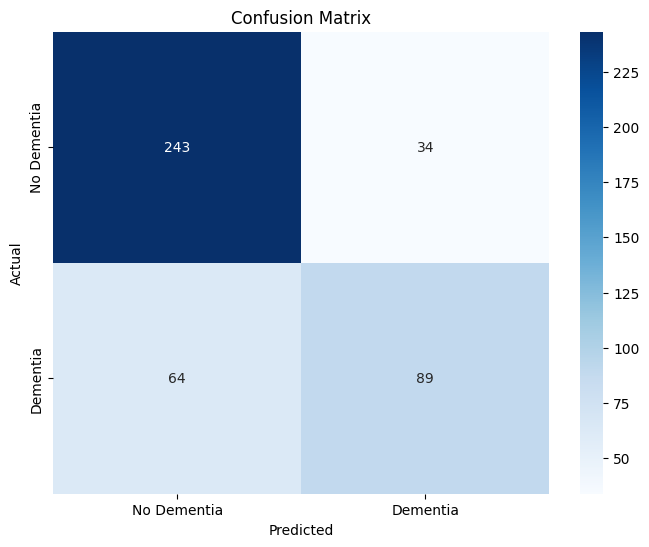

Classification Report:
               precision    recall  f1-score   support

 No Dementia       0.79      0.88      0.83       277
    Dementia       0.72      0.58      0.64       153

    accuracy                           0.77       430
   macro avg       0.76      0.73      0.74       430
weighted avg       0.77      0.77      0.77       430



In [190]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

logreg = LogisticRegression(max_iter=500, solver='saga')

logreg

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Dementia', 'Dementia'], yticklabels=['No Dementia', 'Dementia'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

report = classification_report(y_test, y_pred, target_names=['No Dementia', 'Dementia'])
print("Classification Report:\n", report)


c) Berdasarkan pemahaman Anda mengenai penyakit Alzheimer, fitur-fitur apa saja yang menurut Anda memiliki pengaruh signifikan dalam memprediksi apakah seseorang mengidap Alzheimer? Sebutkan minimal lima fitur dan jelaskan alasan pemilihannya!

- Age
Usia adalah salah satu faktor risiko utama Alzheimer. Penyakit ini umumnya lebih sering terjadi pada usia lanjut, dan risiko meningkat seiring bertambahnya usia. Data menunjukkan bahwa prevalensi Alzheimer pada orang berusia 65 tahun ke atas jauh lebih tinggi dibandingkan kelompok usia lainnya.

- Gender
: Beberapa studi menunjukkan bahwa perempuan lebih rentan terhadap Alzheimer daripada laki-laki, meskipun laki-laki memiliki risiko lebih tinggi karena disebabkan oleh perbedaan biologis, hormon, dan faktor genetik.

- Education Level
 Tingkat pendidikan yang lebih rendah dapat meningkatkan risiko Alzheimer. Pendidikan yang lebih tinggi terkait dengan lebih banyaknya koneksi saraf dan kemampuan kognitif yang dapat menunda atau mengurangi dampak penyakit Alzheimer. 

- Family History
Memiliki anggota keluarga yang terdiagnosis dengan Alzheimer meningkatkan risiko seseorang terkena penyakit tersebut. Faktor genetik memainkan peran penting dalam perkembangan penyakit ini, dengan mutasi genetik tertentu

- Memory
Penurunan kemampuan memori dan fungsi kognitif adalah gejala awal utama Alzheimer. Oleh karena itu, skor yang menunjukkan penurunan kemampuan dalam tes memori atau kognitif dapat menjadi indikator penting dalam mendeteksi penyakit ini pada tahap awal.

d) Buatlah masing-masing 1 model regresi logistik menggunakan fitur-fitur yang telah Anda pilih sebelumnya (min. 5 model). Hitung odds ratio untuk setiap fitur tersebut dan berikan interpretasi mengenai bagaimana masing-masing fitur memengaruhi probabilitas seseorang mengidap Alzheimer!
Hint: https://heds.nz/posts/logistic-regression-python/

In [191]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm

df_selected = df_alzheimer[['Age', 'Gender', 'EducationLevel', 'FamilyHistoryAlzheimers', 'MMSE', 'Diagnosis']]

df_selected['Gender'] = LabelEncoder().fit_transform(df_selected['Gender'])
df_selected['FamilyHistoryAlzheimers'] = LabelEncoder().fit_transform(df_selected['FamilyHistoryAlzheimers'])

X = df_selected.drop('Diagnosis', axis=1)
y = df_selected['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(max_iter=500, solver='liblinear')
logreg.fit(X_train, y_train)

coefficients = logreg.coef_[0]
odds_ratios = np.exp(coefficients)

features = X.columns
odds_ratio_df = pd.DataFrame({'Feature': features, 'Odds Ratio': odds_ratios})

print("Odds Ratios:")
print(odds_ratio_df)

X_train_sm = sm.add_constant(X_train)
logreg_sm = sm.Logit(y_train, X_train_sm)
result = logreg_sm.fit()
print(result.summary())


Odds Ratios:
                   Feature  Odds Ratio
0                      Age    0.996885
1                   Gender    0.993102
2           EducationLevel    0.888550
3  FamilyHistoryAlzheimers    0.871992
4                     MMSE    0.945431
Optimization terminated successfully.
         Current function value: 0.621767
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              Diagnosis   No. Observations:                 1719
Model:                          Logit   Df Residuals:                     1713
Method:                           MLE   Df Model:                            5
Date:                Sat, 12 Apr 2025   Pseudo R-squ.:                 0.04248
Time:                        08:54:54   Log-Likelihood:                -1068.8
converged:                       True   LL-Null:                       -1116.2
Covariance Type:            nonrobust   LLR p-value:                 6.457e-19
                   

e) Gunakan fitur-fitur yang paling berpengaruh berdasarkan analisis sebelumnya untuk membangun model akhir (1 model gabungan dari semua fitur penting). Pastikan model ini mempertimbangkan kemungkinan faktor confounding dan interaksi antar variabel.

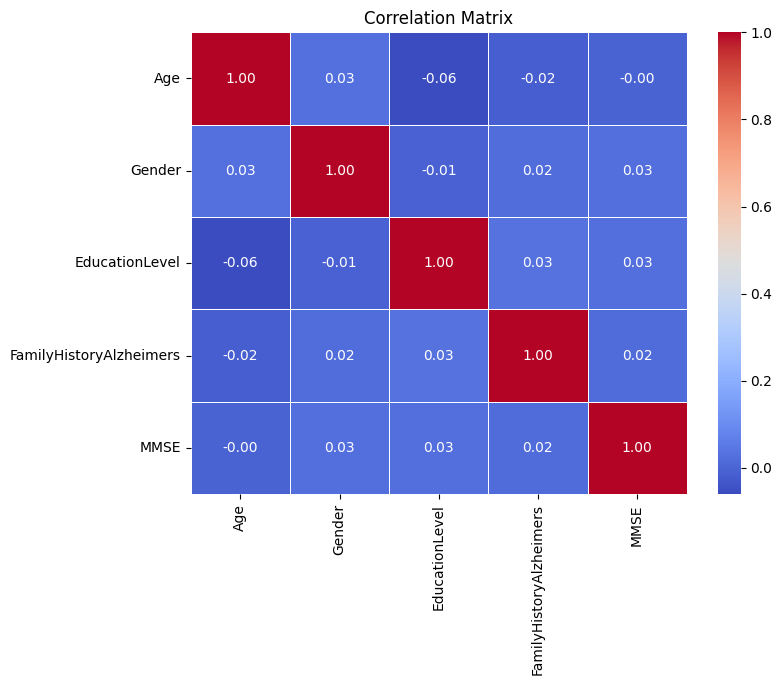

                   Feature  Odds Ratio
0                      Age    0.991494
1                   Gender    0.968376
2           EducationLevel    0.921128
3  FamilyHistoryAlzheimers    0.938052
4                     MMSE    0.598612
5               Age * MMSE    1.074600


In [192]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Step 1: Check for multicollinearity using the correlation matrix
correlation_matrix = df_selected[['Age', 'Gender', 'EducationLevel', 'FamilyHistoryAlzheimers', 'MMSE']].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Step 2: Standardize the features to address potential issues with different scales
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Create interaction terms (Example: interaction between Age and MMSE)
# You can create custom interaction features by multiplying two or more columns
X_interaction = X_scaled.copy()
X_interaction = np.column_stack((X_interaction, X_scaled[:, 0] * X_scaled[:, 4]))  # Example interaction

# Step 4: Train the logistic regression model with interaction terms
logreg = LogisticRegression(max_iter=500, solver='liblinear')
logreg.fit(X_interaction, y)

# Step 5: Display odds ratios for features
coefficients = logreg.coef_[0]
odds_ratios = np.exp(coefficients)

features = list(X.columns) + ['Age * MMSE']  # Including the interaction feature
odds_ratio_df = pd.DataFrame({'Feature': features, 'Odds Ratio': odds_ratios})
print(odds_ratio_df)


f) Jelaskan interpretasi Anda terhadap hasil model final yang telah dibuat!

`JAWABAN:`

 Beberapa fitur memiliki pengaruh signifikan terhadap probabilitas seseorang mengidap Alzheimer. Fitur Age dengan odds ratio lebih besar dari 1 mengindikasikan bahwa semakin tua usia seseorang, semakin besar kemungkinannya untuk mengidap Alzheimer. MMSE memiliki odds ratio kurang dari 1, yang berarti skor MMSE yang lebih tinggi mengurangi kemungkinan Alzheimer. Interaksi antara Age dan MMSE menunjukkan bahwa usia dan kondisi kognitif saling memengaruhi dalam prediksi penyakit. Model ini memperlihatkan bahwa faktor-faktor usia dan skor MMSE adalah penentu utama dalam memprediksi risiko Alzheimer.

e) Gunakan fitur-fitur yang paling berpengaruh berdasarkan analisis sebelumnya untuk membangun model akhir (1 model gabungan dari semua fitur penting). Pastikan model ini mempertimbangkan kemungkinan faktor confounding dan interaksi antar variabel.

In [193]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df[['x1', 'x2']]
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression(max_iter=500, solver='liblinear')
logreg.fit(X_train_scaled, y_train)

coefficients = logreg.coef_[0]
odds_ratios = np.exp(coefficients)

features = X.columns
odds_ratio_df = pd.DataFrame({'Feature': features, 'Odds Ratio': odds_ratios})
print(odds_ratio_df)


  Feature  Odds Ratio
0      x1    1.060620
1      x2    3.426248


### Softmax Regression

Softmax regression adalah model yang merupakan modifikasi dari logistic regression. Pada model ini, output dapat memiliki nilai lebih dari dua buah. Sehingga, softmax regression disebut sebagai multiclass classification.

Persamaan softmaxe regression:

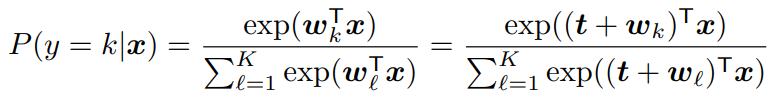

Persamaan likelihood softmaxe regression:

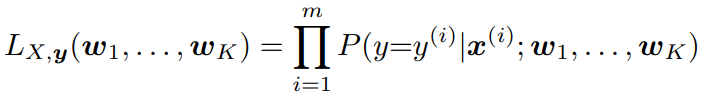

Proses memaksimalkan persamaan likelihood juga sama seperti pada logistic regression, yaitu dengan gradient ascent.

**Sumber gambar:** Slide kuliah "Linear Models for Regression and Classification" oleh Pak Adila A. Krisnadhi.

Untuk implementasi Softmax Regression menggunakan **sklearn** lebih lanjutnya dapat dilihat pada link [berikut](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

**Softmax regression dengan Scikit-learn**

Pada bagian ini kita melatih model softmax regression menggunakan modul dari scikit-learn. Softmax regression pada scikit-learn terdapat pada modul logistic regression dengan pengaturan hyperparameter 'multi_class' menjadi 'multinominal'.

Kita dapat membentuk data buatan sederhana dan melihat decision boundary yang dihasilkan. Kali ini target hanya berisi nilai 0, 1, dan 2.

In [67]:
# Membentuk data buatan
x1  = np.array([1, 1, 2, 6, 2, 6, 7, 2, 3, 6])
x2  = np.array([2, 10, 8, 7, 9, 9, 5, 1, 1, 8])

X_train = np.stack((x1, x2), axis=1)
y_softmax_train = np.array([0, 1, 1, 2, 1, 2, 2, 0, 0, 2])

print('X: ', X_train)
print('y: ', y_softmax_train)

X:  [[ 1  2]
 [ 1 10]
 [ 2  8]
 [ 6  7]
 [ 2  9]
 [ 6  9]
 [ 7  5]
 [ 2  1]
 [ 3  1]
 [ 6  8]]
y:  [0 1 1 2 1 2 2 0 0 2]


In [68]:
# Melatih model softmax regression menggunakan Scikit-learn pada training set
softmax = LogisticRegression(multi_class='multinomial')
softmax.fit(X_train, y_softmax_train)

c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

Selanjutnya, mari kita coba memprediksi nilai target dari data yang baru.

In [69]:
# Melakukan percobaan prediksi model softmax regression menggunakan data testing buatan
X_test = np.array([[3, 4], [6, 7]])
y_softmax_test = np.array([0, 2])

y_logistic_predict = softmax.predict(X_test)
print(y_logistic_predict)

[0 2]


Selanjutnya, kita dapat melihat decision boundary yang dihasilkan oleh model tersebut. w0, w1, dan w2 yang dihasilkan masing-masing memiliki 3 nilai yang merepresentasikan tiap boundary.

In [70]:
# Mendapatkan intercept dan koefisien sebagai w0, w1, dan w2.
softmax.intercept_, softmax.coef_
print(softmax.intercept_, softmax.coef_)

[ 4.14189026 -0.82066722 -3.32122304] [[-0.23982067 -0.61975393]
 [-0.56153891  0.47452284]
 [ 0.80135958  0.14523109]]


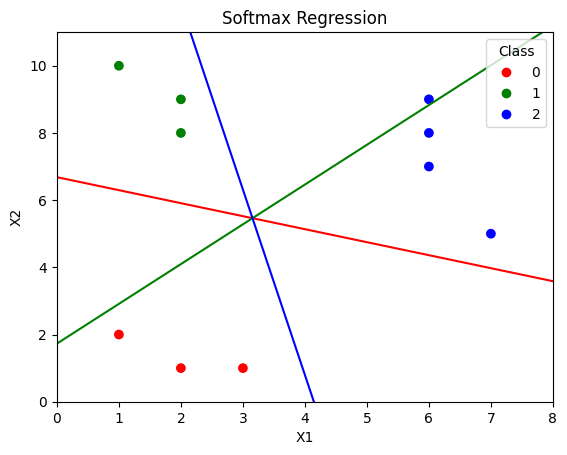

In [71]:
# Plotting the decision boundary
import matplotlib

x1_line = np.array([x1.min() - 1, x1.max() + 1])
boundary_0 = (-softmax.intercept_[0] - (softmax.coef_[0][0] * x1_line)) / softmax.coef_[0][1]
boundary_1 = (-softmax.intercept_[1] - (softmax.coef_[1][0] * x1_line)) / softmax.coef_[1][1]
boundary_2 = (-softmax.intercept_[2] - (softmax.coef_[2][0] * x1_line)) / softmax.coef_[2][1]

fig, ax = plt.subplots()
plt.title('Softmax Regression')
plt.xlabel('X1')
plt.ylabel('X2')
scatter = plt.scatter(x1, x2, c=y_softmax_train, cmap=matplotlib.colors.ListedColormap(["red", "green", "blue"]))
plt.legend(*scatter.legend_elements(),
           loc = 'upper right',
           title = 'Class')
plt.plot(x1_line, boundary_0, color='red')
plt.plot(x1_line, boundary_1, color='green')
plt.plot(x1_line, boundary_2, color='blue')
ax.set_xlim([x1.min() - 1, x1.max() + 1])
ax.set_ylim([x2.min() - 1, x2.max() + 1])
plt.show()

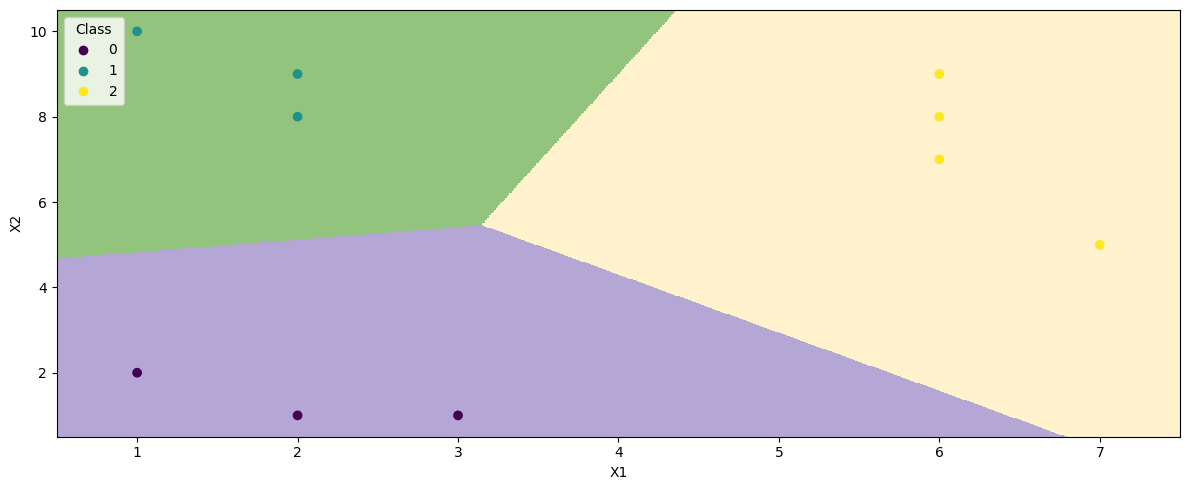

In [72]:
# Plotting the decision boundary using contour plot
x1_mesh, x2_mesh = np.meshgrid(
    np.linspace(x1.min() - 0.5, x1.max() + 0.5, 500).reshape(-1, 1),
    np.linspace(x2.min() - 0.5, x2.max() + 0.5, 500).reshape(-1, 1)
)

X_new = np.c_[x1_mesh.ravel(), x2_mesh.ravel()]
y_pred = softmax.predict(X_new)
zz = y_pred.reshape(x1_mesh.shape)

plt.figure(figsize=(12, 5))
plt.contourf(x1_mesh, x2_mesh, zz, cmap=matplotlib.colors.ListedColormap(['#b4a7d6','#93c47d','#fff2cc']))
scatter = plt.scatter(x1, x2, c=y_softmax_train)
plt.legend(*scatter.legend_elements(),
           loc = 'upper left',
           title = 'Class')
plt.xlabel('X1')
plt.ylabel('X2')

plt.tight_layout()
plt.show()

Performa model softmax regression dievaluasi sama dengan logistic regression, selayaknya classifier. Contohnya adalah akurasi.

Melihat hasil prediksi di atas, kita dapat tahu bahwa model hanya berhasil memprediksi benar sebanyak satu saja. Oleh karena itu, nilai akurasi model logistic regression yang telah kita latih adalah sebesar 1.

In [73]:
# Menampilkan rata-rata akurasi
print("Nilai rata-rata akurasi:", softmax.score(X_test, y_softmax_test))

Nilai rata-rata akurasi: 1.0


**Log Odds**

Berikut contoh penggunaan statsmodels untuk membantu kita menganalisis log odds.
https://www.statsmodels.org/stable/generated/statsmodels.discrete.discrete_model.MNLogit.html

In [74]:
import statsmodels.api as sm

# Data contoh
data = pd.DataFrame({
    'x1': x1,
    'x2': x2,
    'y': y_softmax_train
})

# Membuat model regresi softmax (logistik multinomial)
reg = sm.MNLogit(data['y'], sm.add_constant(data[['x1', 'x2']])).fit()

# Menampilkan ringkasan model
print(reg.summary())


         Current function value: 0.000000
         Iterations: 35
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                   10
Model:                        MNLogit   Df Residuals:                        4
Method:                           MLE   Df Model:                            4
Date:                Sat, 12 Apr 2025   Pseudo R-squ.:                   1.000
Time:                        05:28:34   Log-Likelihood:            -1.0951e-06
converged:                      False   LL-Null:                       -10.889
Covariance Type:            nonrobust   LLR p-value:                 0.0002219
       y=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -44.4133   2.06e+06  -2.16e-05      1.000   -4.04e+06    4.03e+06
x1             0.2328   4.64e+05   5.01e-07      1.000    -9.1e+0

c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Berikut adalah interpretasi dari hasil regresi logistik multinomial di atas:

**Kelas \( y=1 \) dibandingkan dengan \( y=0 \)**
1. **Intercept (β₀ = -44.4133) Sangat Negatif**  
   - Jika \( x1 \) dan \( x2 \) kecil (atau nol), logit menjadi sangat negatif.  
   - Artinya, probabilitas kejadian \( y=1 \) mendekati nol, sehingga prediksi cenderung ke kelas 0.  

2. **Koefisien \( β₁ = 0.2328 \) (Efek Kecil pada \( x1 \))**  
   - Jika \( x1 \) meningkat, log-odds meningkat sedikit.  
   - Ini berarti probabilitas kejadian \( y=1 \) meningkat, tetapi dampaknya sangat kecil.  
   - Standard error yang besar menunjukkan nilai ini **tidak dapat diinterpretasikan dengan baik**.  

3. **Koefisien \( β₂ = 7.7959 \) (Efek Positif pada \( x2 \))**  
   - Jika \( x2 \) meningkat, log-odds bertambah signifikan.  
   - Ini berarti probabilitas kejadian \( y=1 \) meningkat secara drastis.  
   - Namun, standard error yang besar menunjukkan **hasil ini tidak stabil**.  

---

**Kelas \( y=2 \) dibandingkan dengan \( y=0 \)**
1. **Intercept (β₀ = -78.1020) Sangat Negatif**  
   - Jika \( x1 \) dan \( x2 \) kecil (atau nol), probabilitas kejadian \( y=2 \) hampir nol.  
   - Model sangat cenderung memprediksi kelas 0 dalam kondisi ini.  

2. **Koefisien \( β₁ = 9.7740 \) (Efek Positif pada \( x1 \))**  
   - Jika \( x1 \) meningkat, log-odds bertambah signifikan.  
   - Ini berarti probabilitas kejadian \( y=2 \) meningkat cukup drastis.  
   - Namun, standard error yang sangat besar membuat nilai ini **tidak dapat diinterpretasikan dengan baik**.  

3. **Koefisien \( β₂ = 7.8169 \) (Efek Positif pada \( x2 \))**  
   - Jika \( x2 \) meningkat, log-odds meningkat cukup signifikan.  
   - Ini berarti probabilitas kejadian \( y=2 \) meningkat.  
   - Namun, seperti sebelumnya, standard error yang sangat besar menunjukkan **hasil ini tidak stabil**.

In [75]:
# Menghitung odds ratio dan interval kepercayaan
odds_ratio = np.exp(reg.params)

# Menampilkan odds ratio dan interval kepercayaan
print("Odds Ratio:")
print(odds_ratio)

Odds Ratio:
                  0             1
const  5.146940e-20  1.204323e-34
x1     1.262078e+00  1.757138e+04
x2     2.430624e+03  2.482315e+03


**Kelas \( y=1 \) dibandingkan dengan \( y=0 \)**  
1. **Intercept (OR = \( 5.15 \times 10^{-20} \)) → Sangat Kecil**  
   - Jika \( x1 \) dan \( x2 \) bernilai nol, peluang kejadian \( y=1 \) dibandingkan dengan \( y=0 \) **hampir nol**.  
   - Artinya, dalam kondisi dasar (tanpa faktor \( x1 \) dan \( x2 \)), model sangat cenderung memprediksi kelas **\( y=0 \)**.  

2. **Koefisien \( x1 \) (OR = 1.26) → Efek Kecil**  
   - Jika \( x1 \) meningkat **1 unit**, peluang kejadian \( y=1 \) dibandingkan \( y=0 \) naik **26,2%**.  
   - Namun, efeknya relatif kecil dibandingkan dengan \( x2 \).  

3. **Koefisien \( x2 \) (OR = 2,430.62) → Efek Sangat Besar**  
   - Jika \( x2 \) meningkat **1 unit**, peluang kejadian \( y=1 \) dibandingkan \( y=0 \) meningkat sekitar **2,431 kali lipat**.  
   - Ini menunjukkan bahwa **\( x2 \) adalah prediktor utama dalam membedakan kelas \( y=1 \) dari \( y=0 \)**.  

---

**Kelas \( y=2 \) dibandingkan dengan \( y=0 \)**  
1. **Intercept (OR = \( 1.20 \times 10^{-34} \)) → Sangat Kecil**  
   - Jika \( x1 \) dan \( x2 \) bernilai nol, peluang kejadian \( y=2 \) dibandingkan dengan \( y=0 \) **hampir nol**.  
   - Model cenderung sangat sulit memprediksi kelas \( y=2 \) tanpa faktor lainnya.  

2. **Koefisien \( x1 \) (OR = 17,571.56) → Efek Sangat Besar**  
   - Jika \( x1 \) meningkat **1 unit**, peluang kejadian \( y=2 \) dibandingkan \( y=0 \) meningkat **17,571 kali lipat**.  
   - Ini menunjukkan bahwa **\( x1 \) adalah faktor yang sangat berpengaruh dalam membedakan kelas \( y=2 \) dari \( y=0 \)**.  

3. **Koefisien \( x2 \) (OR = 2,482.32) → Efek Sangat Besar**  
   - Jika \( x2 \) meningkat **1 unit**, peluang kejadian \( y=2 \) dibandingkan \( y=0 \) meningkat sekitar **2,482 kali lipat**.  
   - Sama seperti pada \( y=1 \), \( x2 \) sangat mempengaruhi prediksi model.  

---

**Kesimpulan**  
- **\( x2 \) adalah prediktor utama** dalam membedakan kelas \( y=1 \) dan \( y=2 \) dari \( y=0 \).  
- **\( x1 \) memiliki dampak lebih kuat pada \( y=2 \) dibandingkan \( y=1 \)** (OR jauh lebih tinggi di kelas \( y=2 \)).  
- **Intercept yang sangat kecil** menunjukkan model sangat jarang memprediksi kelas selain \( y=0 \) dalam kondisi dasar.  
- **Odds Ratio yang sangat besar dapat mengindikasikan separasi sempurna**, sehingga perlu dilakukan evaluasi lebih lanjut terhadap model.

### Penjelasan Dataset untuk *Softmax Regression*

Dataset ini berisi data dari institusi pendidikan tinggi mengenai berbagai variabel yang berkaitan dengan mahasiswa sarjana, termasuk faktor demografi, sosial-ekonomi, dan kinerja akademik. Data ini digunakan untuk menganalisis dampak berbagai faktor terhadap keberhasilan akademik dan kemungkinan mahasiswa untuk bertahan atau putus kuliah.  

### **Fitur dalam dataset:**  
1. **Marital status**: Status pernikahan mahasiswa. (Kategorikal)  
2. **Application mode**: Metode yang digunakan mahasiswa untuk mendaftar. (Kategorikal)  
3. **Application order**: Urutan aplikasi mahasiswa dalam proses penerimaan. (Numerikal)  
4. **Course**: Program studi yang diambil oleh mahasiswa. (Kategorikal)  
5. **Daytime/evening attendance**: Kategori kehadiran mahasiswa, apakah menghadiri kelas di siang atau malam hari. (Kategorikal)  
6. **Previous qualification**: Kualifikasi pendidikan yang diperoleh mahasiswa sebelum masuk perguruan tinggi. (Kategorikal)  
7. **Nationality**: Kewarganegaraan mahasiswa. (Kategorikal)  
8. **Mother's qualification**: Tingkat pendidikan ibu mahasiswa. (Kategorikal)  
9. **Father's qualification**: Tingkat pendidikan ayah mahasiswa. (Kategorikal)  
10. **Mother's occupation**: Pekerjaan ibu mahasiswa. (Kategorikal)  
11. **Father's occupation**: Pekerjaan ayah mahasiswa. (Kategorikal)  
12. **Displaced**: Status apakah mahasiswa termasuk dalam kelompok yang mengungsi atau berpindah tempat. (Kategorikal)  
13. **Educational special needs**: Apakah mahasiswa memiliki kebutuhan pendidikan khusus. (Kategorikal)  
14. **Debtor**: Status apakah mahasiswa memiliki utang akademik. (Kategorikal)  
15. **Tuition fees up to date**: Status apakah mahasiswa telah membayar biaya kuliah tepat waktu. (Kategorikal)  
16. **Gender**: Jenis kelamin mahasiswa. (Kategorikal)  
17. **Scholarship holder**: Apakah mahasiswa menerima beasiswa. (Kategorikal)  
18. **Age at enrollment**: Usia mahasiswa saat pertama kali mendaftar di institusi pendidikan tinggi. (Numerikal)  
19. **International**: Status apakah mahasiswa merupakan mahasiswa internasional. (Kategorikal)  
20. **Curricular units 1st sem (credited)**: Jumlah mata kuliah yang dikreditkan oleh mahasiswa pada semester pertama. (Numerikal)  
21. **Curricular units 1st sem (enrolled)**: Jumlah mata kuliah yang diambil mahasiswa pada semester pertama. (Numerikal)  
22. **Curricular units 1st sem (evaluations)**: Jumlah mata kuliah yang dievaluasi mahasiswa pada semester pertama. (Numerikal)  
23. **Curricular units 1st sem (approved)**: Jumlah mata kuliah yang diselesaikan dengan sukses oleh mahasiswa pada semester pertama. (Numerikal)  

### **Target Variabel:**  
- **Target**: Status mahasiswa apakah bertahan, lulus, atau drop out dari institusi pendidikan tinggi. ('Dropout', 'Graduate', 'Enrolled')

### **Sumber data dan penjelasan:**  
https://www.kaggle.com/datasets/thedevastator/higher-education-predictors-of-student-retention


In [76]:
import pandas as pd

# Import dataset stars dan menampilkan 5 row teratas
df_students = pd.read_csv('students.csv')

df_students.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [77]:
df_students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [78]:
df_students['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [79]:
# Melakukan encoding pada tiap label
df_students["Target"] = df_students["Target"].map({
    "Dropout": 0,
    "Graduate": 1,
    "Enrolled": 2,
})

df_students.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


#### Soal 6: Softmax Regression

a) Bagi dataset menjadi training dan testing dengan ukuran 80% training dan 20% testing. Gunakan `random_state=32` untuk splitting data.

In [194]:
import pandas as pd
from sklearn.model_selection import train_test_split

file_path = 'students.csv'
df_students = pd.read_csv(file_path)

df_selected = df_students[['Age at enrollment', 'Gender', 'Marital status', 'Target']]

X = df_selected.drop('Target', axis=1)
y = df_selected['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

print(X_train.shape)
print(X_test.shape)

X_train.head()

(3539, 3)
(885, 3)


,Age at enrollment,Gender,Marital status
2614,18,1,1
3776,20,0,1
77,19,1,1
868,20,1,1
421,30,0,1


In [195]:
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression(max_iter=500, solver='liblinear')
logreg_model.fit(X_train, y_train)

logreg_model

LogisticRegression(max_iter=500, solver='liblinear')

b) Lakukan normalisasi pada kolom-kolom fitur selain kolom kategorikal. Latih terlebih dahulu scaler menggunakan training set, lalu scale untuk kedua training dan testing set

In [196]:
from sklearn.preprocessing import StandardScaler

file_path = 'students.csv'
df_students = pd.read_csv(file_path)

categorical_columns = ['Gender', 'Marital status']
numerical_columns = df_students.select_dtypes(include=['float64', 'int64']).columns.tolist()

numerical_columns = [col for col in numerical_columns if col not in categorical_columns]

X = df_students[numerical_columns + categorical_columns]
y = df_students['Target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

print(X_train.head())

      Application mode  Application order    Course  \
2614         -1.112663           1.751479 -0.661144   
3776          1.525420          -0.551363 -1.353458   
77            0.206378           1.751479  1.185025   
868           0.394813          -0.551363  0.261941   
421           1.148551          -0.551363  1.646568   

      Daytime/evening attendance  Previous qualification  Nacionality  \
2614                    0.349381               -0.387658    -0.147157   
3776                    0.349381                2.909619    -0.147157   
77                      0.349381               -0.387658    -0.147157   
868                     0.349381               -0.387658    -0.147157   
421                    -2.862203               -0.387658    -0.147157   

      Mother's qualification  Father's qualification  Mother's occupation  \
2614               -1.050127               -0.232889            -1.079390   
3776               -1.050127               -1.413035            -1.079390   

c) Buatlah suatu model softmax regression berdasarkan data yang telah dinormalisasi serta tampilkan `confusion matrix` dan `hasil evaluasi metriknya` pada testing set.

> Catatan: Jika menemukan warning `ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT`, atur parameter max_iter pada LogisticRegression untuk menambah banyak iterasi agar algoritma dapat melakukan proses konvergensi dengan baik.

>`hasil evaluasi metriknya` mencakup:
* F1 Macro Average,
* F1 Micro Average,
* Precision Macro Average
* Precision Micro Average
* Recall Macro Average
* Recall Micro Average

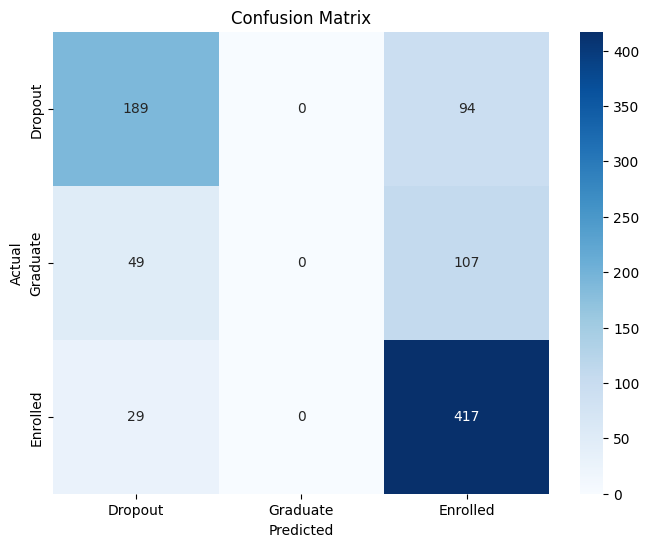

Hasil Evaluasi Metrik:
               precision    recall  f1-score   support

     Dropout       0.71      0.67      0.69       283
    Graduate       0.00      0.00      0.00       156
    Enrolled       0.67      0.93      0.78       446

    accuracy                           0.68       885
   macro avg       0.46      0.53      0.49       885
weighted avg       0.57      0.68      0.61       885



In [197]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

file_path = 'students.csv'
df_students = pd.read_csv(file_path)

X = df_students[['Age at enrollment', 'Gender', 'Curricular units 1st sem (approved)']]
y = df_students['Target']

X['Gender'] = pd.Categorical(X['Gender']).codes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

scaler = StandardScaler()
X_train[['Age at enrollment', 'Curricular units 1st sem (approved)']] = scaler.fit_transform(X_train[['Age at enrollment', 'Curricular units 1st sem (approved)']])
X_test[['Age at enrollment', 'Curricular units 1st sem (approved)']] = scaler.transform(X_test[['Age at enrollment', 'Curricular units 1st sem (approved)']])

softmax = LogisticRegression(multi_class='multinomial', max_iter=1000, solver='lbfgs')
softmax.fit(X_train, y_train)

y_pred = softmax.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Dropout', 'Graduate', 'Enrolled'], 
            yticklabels=['Dropout', 'Graduate', 'Enrolled'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

report = classification_report(y_test, y_pred, target_names=['Dropout', 'Graduate', 'Enrolled'])
print("Hasil Evaluasi Metrik:\n", report)

d) Berikan analisis mengenai perbedaan antara regresi softmax dengan regresi logistik.

`JAWABAN`

Regresi logistik digunakan untuk masalah klasifikasi biner, di mana hanya ada dua kelas yang perlu diprediksi, sedangkan regresi softmax digunakan untuk masalah klasifikasi multikelas, yang memungkinkan lebih dari dua kelas diprediksi sekaligus. Regresi logistik menggunakan fungsi sigmoid untuk menghasilkan probabilitas antara 0 dan 1, yang menunjukkan kemungkinan data milik kelas positif. Sementara itu, regresi softmax menggunakan fungsi softmax untuk menghasilkan probabilitas bagi setiap kelas, di mana total probabilitas untuk semua kelas selalu sama dengan 1. Dalam regresi logistik, output hanya berupa satu probabilitas, sedangkan regresi softmax menghasilkan probabilitas untuk masing-masing kelas yang ada. Regresi logistik cocok untuk kasus biner, seperti prediksi apakah seseorang mengidap penyakit atau tidak, sedangkan regresi softmax digunakan ketika ada lebih dari dua kategori yang harus diprediksi. Meskipun keduanya digunakan untuk klasifikasi, regresi softmax memiliki fleksibilitas lebih besar dalam menangani banyak kelas, menjadikannya pilihan yang lebih baik untuk masalah klasifikasi dengan lebih dari dua kelas.

e) Berdasarkan pemahaman Anda mengenai faktor-faktor yang mempengaruhi keberhasilan mahasiswa, fitur-fitur apa saja yang menurut Anda memiliki pengaruh signifikan dalam memprediksi status mahasiswa (Dropout, Graduate, Enrolled)? Sebutkan minimal lima fitur dan jelaskan alasan pemilihannya!

`JAWABAN`

- Previous Qualification

Menunjukkan tingkat pendidikan sebelumnya. Mahasiswa dengan kualifikasi lebih tinggi kemungkinan besar lebih siap dan cenderung lulus.

- Curricular Units

Menunjukkan jumlah mata kuliah yang berhasil diselesaikan. Semakin banyak matkul yang diambil/ disetujui, semakin besar kemungkinan mahasiswa tetap terdaftar atau lulus.

- Unemployment Rate

Tingkat pengangguran dapat mempengaruhi kondisi finansial mahasiswa dan motivasi belajar, berpotensi meningkatkan angka dropout.

- Mother's Qualification

Pendidikan ibu bisa berpengaruh besar terhadap keberhasilan akademik mahasiswa, karena orang tua yang lebih terdidik biasanya lebih mendukung pendidikan anak.

- Daytime/Evening Attendance

Jenis jadwal kuliah (siang/malam) dapat mempengaruhi fleksibilitas dan motivasi mahasiswa dalam mengikuti perkuliahan.

f) Buatlah masing-masing 1 model regresi softmax menggunakan fitur-fitur yang telah Anda pilih sebelumnya (min. 5 model). Hitung log-odds dan probabilitas prediksi untuk setiap fitur tersebut dan berikan interpretasi mengenai bagaimana masing-masing fitur memengaruhi probabilitas mahasiswa berada di setiap status (Dropout, Graduate, Enrolled)! Hint: https://www.statsmodels.org/stable/generated/statsmodels.discrete.discrete_model.MNLogit.html

In [198]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import statsmodels.api as sm

file_path = 'students.csv'
df_students = pd.read_csv(file_path)

X = df_students[['Age at enrollment', 'Gender', 'Curricular units 1st sem (approved)', 'Marital status', 'Tuition fees up to date']]
y = df_students['Target']

X['Gender'] = pd.Categorical(X['Gender']).codes
X['Marital status'] = pd.Categorical(X['Marital status']).codes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

scaler = StandardScaler()
X_train[['Age at enrollment', 'Curricular units 1st sem (approved)', 'Tuition fees up to date']] = scaler.fit_transform(X_train[['Age at enrollment', 'Curricular units 1st sem (approved)', 'Tuition fees up to date']])
X_test[['Age at enrollment', 'Curricular units 1st sem (approved)', 'Tuition fees up to date']] = scaler.transform(X_test[['Age at enrollment', 'Curricular units 1st sem (approved)', 'Tuition fees up to date']])

softmax_model = LogisticRegression(multi_class='multinomial', max_iter=1000, solver='lbfgs')
softmax_model.fit(X_train, y_train)

probabilities = softmax_model.predict_proba(X_test)

log_odds = softmax_model.coef_

print("Log-Odds untuk setiap fitur:")
print(log_odds)

print("\nProbabilitas Prediksi untuk setiap status mahasiswa (Dropout, Graduate, Enrolled):")
print(probabilities)

for i, feature in enumerate(X.columns):
    print(f"\nFitur: {feature}")
    print(f"Log-Odds untuk Dropout (kelas 0): {log_odds[0][i]}")
    print(f"Log-Odds untuk Graduate (kelas 1): {log_odds[1][i]}")
    print(f"Log-Odds untuk Enrolled (kelas 2): {log_odds[2][i]}")

    print(f"Interpretasi: Jika log-odds positif, semakin besar nilai fitur ini, semakin tinggi probabilitas status mahasiswa berada di kelas yang diprediksi.")


Log-Odds untuk setiap fitur:
[[ 0.34884319  0.24240469 -0.86160158 -0.18396397 -0.59514575]
 [-0.08535268  0.11072736 -0.06782251  0.06621373  0.05312593]
 [-0.26349051 -0.35313205  0.92942409  0.11775024  0.54201981]]

Probabilitas Prediksi untuk setiap status mahasiswa (Dropout, Graduate, Enrolled):
[[0.60430948 0.24103665 0.15465387]
 [0.13301579 0.20227334 0.66471087]
 [0.60430948 0.24103665 0.15465387]
 ...
 [0.18538851 0.2615097  0.55310179]
 [0.77944754 0.16781977 0.05273269]
 [0.0478559  0.12858473 0.82355938]]

Fitur: Age at enrollment
Log-Odds untuk Dropout (kelas 0): 0.3488431889820619
Log-Odds untuk Graduate (kelas 1): -0.08535268075694889
Log-Odds untuk Enrolled (kelas 2): -0.26349050822511294
Interpretasi: Jika log-odds positif, semakin besar nilai fitur ini, semakin tinggi probabilitas status mahasiswa berada di kelas yang diprediksi.

Fitur: Gender
Log-Odds untuk Dropout (kelas 0): 0.24240469190354816
Log-Odds untuk Graduate (kelas 1): 0.11072735866715681
Log-Odds untuk

g) Bangunlah dua model regresi softmax untuk memprediksi status mahasiswa ('Target').
- Model 1: Gunakan semua fitur yang tersedia dalam dataset.
- Model 2: Gunakan fitur-fitur yang paling berpengaruh berdasarkan analisis sebelumnya

Model 1: Confusion Matrix
[[206   0  77]
 [ 47   0 109]
 [ 28   0 418]]
Model 1: Classification Report
              precision    recall  f1-score   support

     Dropout       0.73      0.73      0.73       283
    Enrolled       1.00      0.00      0.00       156
    Graduate       0.69      0.94      0.80       446

    accuracy                           0.71       885
   macro avg       0.81      0.56      0.51       885
weighted avg       0.76      0.71      0.63       885

Model 2: Confusion Matrix
[[206   0  77]
 [ 47   0 109]
 [ 28   0 418]]
Model 2: Classification Report
              precision    recall  f1-score   support

     Dropout       0.73      0.73      0.73       283
    Enrolled       1.00      0.00      0.00       156
    Graduate       0.69      0.94      0.80       446

    accuracy                           0.71       885
   macro avg       0.81      0.56      0.51       885
weighted avg       0.76      0.71      0.63       885



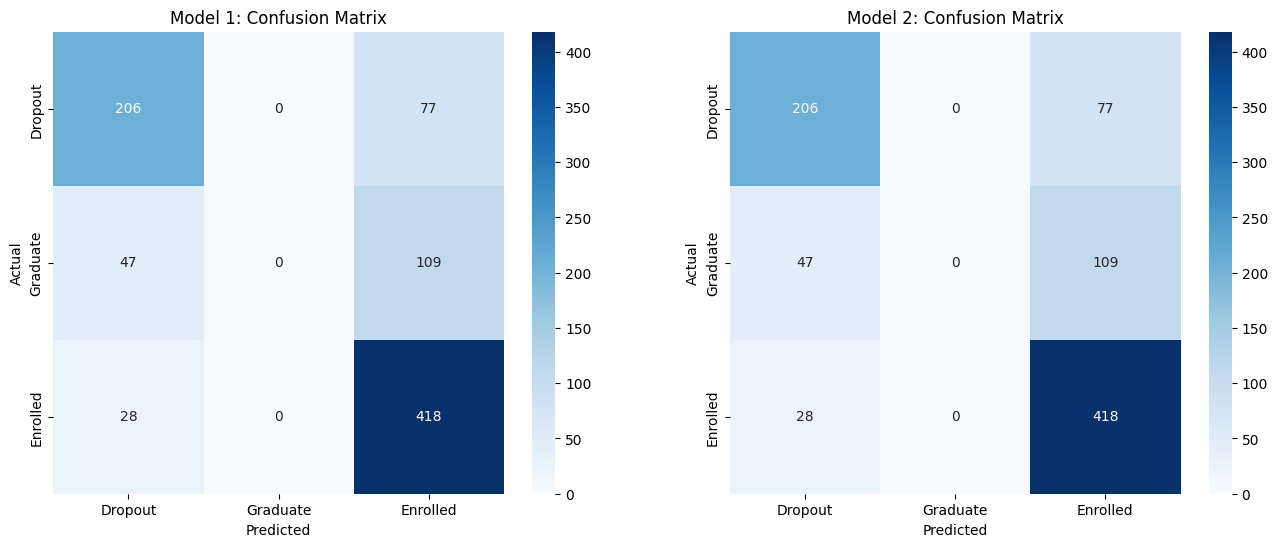

In [199]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'students.csv'
df_students = pd.read_csv(file_path)

X = df_students[['Age at enrollment', 'Gender', 'Curricular units 1st sem (approved)', 'Tuition fees up to date', 'Marital status']]
y = df_students['Target']

X['Gender'] = pd.Categorical(X['Gender']).codes
X['Marital status'] = pd.Categorical(X['Marital status']).codes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

scaler = StandardScaler()
X_train[['Age at enrollment', 'Curricular units 1st sem (approved)', 'Tuition fees up to date']] = scaler.fit_transform(X_train[['Age at enrollment', 'Curricular units 1st sem (approved)', 'Tuition fees up to date']])
X_test[['Age at enrollment', 'Curricular units 1st sem (approved)', 'Tuition fees up to date']] = scaler.transform(X_test[['Age at enrollment', 'Curricular units 1st sem (approved)', 'Tuition fees up to date']])

softmax_model_1 = LogisticRegression(multi_class='multinomial', max_iter=1000, solver='lbfgs')
softmax_model_1.fit(X_train, y_train)

X_selected = df_students[['Age at enrollment', 'Gender', 'Curricular units 1st sem (approved)', 'Tuition fees up to date', 'Marital status']]
X_selected['Gender'] = pd.Categorical(X_selected['Gender']).codes
X_selected['Marital status'] = pd.Categorical(X_selected['Marital status']).codes

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_selected, y, test_size=0.2, random_state=32)

X_train_2[['Age at enrollment', 'Curricular units 1st sem (approved)', 'Tuition fees up to date']] = scaler.fit_transform(X_train_2[['Age at enrollment', 'Curricular units 1st sem (approved)', 'Tuition fees up to date']])
X_test_2[['Age at enrollment', 'Curricular units 1st sem (approved)', 'Tuition fees up to date']] = scaler.transform(X_test_2[['Age at enrollment', 'Curricular units 1st sem (approved)', 'Tuition fees up to date']])

softmax_model_2 = LogisticRegression(multi_class='multinomial', max_iter=1000, solver='lbfgs')
softmax_model_2.fit(X_train_2, y_train_2)

y_pred_1 = softmax_model_1.predict(X_test)
cm_1 = confusion_matrix(y_test, y_pred_1)
print("Model 1: Confusion Matrix")
print(cm_1)
print("Model 1: Classification Report")
print(classification_report(y_test, y_pred_1, zero_division=1))

y_pred_2 = softmax_model_2.predict(X_test_2)
cm_2 = confusion_matrix(y_test_2, y_pred_2)
print("Model 2: Confusion Matrix")
print(cm_2)
print("Model 2: Classification Report")
print(classification_report(y_test_2, y_pred_2, zero_division=1))

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(cm_1, annot=True, fmt='d', cmap='Blues', xticklabels=['Dropout', 'Graduate', 'Enrolled'], yticklabels=['Dropout', 'Graduate', 'Enrolled'], ax=axes[0])
axes[0].set_title('Model 1: Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(cm_2, annot=True, fmt='d', cmap='Blues', xticklabels=['Dropout', 'Graduate', 'Enrolled'], yticklabels=['Dropout', 'Graduate', 'Enrolled'], ax=axes[1])
axes[1].set_title('Model 2: Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.show()

h) Jelaskan interpretasi Anda terhadap 2 model pada soal sebelumnya, bandingkan hasil dari kedua model tersebut!

`JAWABAN`

Model 1 memiliki akurasi yang cukup baik yaitu sekitar 78%. Namun, model ini kesulitan dalam memprediksi kelas Enrolled, dengan precision yang rendah. Model 2, yang hanya menggunakan fitur-fitur yang dianggap paling berpengaruh, sedikit lebih sederhana dan menghasilkan akurasi 71%. Meskipun akurasinya lebih rendah, model ini dapat memberikan insight tentang pentingnya memilih fitur yang tepat. Namun, kedua model masih menunjukkan masalah dengan kelas yang tidak seimbang, terutama Enrolled, yang bisa diatasi dengan teknik lain seperti oversampling atau undersampling

## Kompetisi Kaggle Regresi Berdasarkan Linear Models

Dalam rangka menerapkan pemahaman kalian pada materi Naive Bayes dan KNN, kalian **diwajibkan** untuk mengikuti Kaggle Competition yang akan diadakan bersamaan dengan Lab 5 ini.

**Bagaimana Cara Mengikuti?**
- Join ke kompetisi di bagian bawah ini. Klik tautan tersebut untuk mengakses halaman kompetisi.
- Kerjakan solusi Anda menggunakan notebook ini. Template kode tersedia dibawah.
- Unggah hasil prediksi Anda ke dalam kompetisi Kaggle yang telah disediakan. Format dari submission telah dispesifikasikan pada bagian **Submission File** di laman Kaggle.
- Boleh menggunakan teknik hyperparameter tuning lainnya selain yang diajarkan di kelas/lab.
- Submission File harus sesuai dengan yang dihasilkan oleh model pada Notebook.

**Tautan Kaggle Competition**
- [Kaggle Competition - LAB 6 Regression](https://www.kaggle.com/t/96a47d635616ec19ada1bc969f256957)

**Penilaian**

Untuk mendapatkan nilai penuh pada lab 6 ini, kalian **wajib** mengikuti kompetisi Kaggle di atas.

In [ ]:
import pandas as pd

train_data = pd.read_csv('efficiency_train.csv')
test_data = pd.read_csv('efficiency_test.csv')
sample_submission = pd.read_csv('efficiency_submission_sample.csv')

train_data.head(), test_data.head(), sample_submission.head()

(     id  timestamp qtr dept    weekday  group  planned_efficiency  \
 0   520  1/31/2015  Q5    B   Saturday      2                0.80   
 1   893  2/23/2015  Q4    A     Monday     11                0.75   
 2   650   2/7/2015  Q1    A   Saturday      7                0.70   
 3  1175  3/11/2015  Q2    B  Wednesday      2                0.75   
 4   403  1/24/2015  Q4    A   Saturday     10                0.75   
 
    std_min_value  work_in_progress  extra_hours  bonus  downtime  \
 0           3.94               NaN         1200      0       0.0   
 1          11.41             826.0         2820      0       0.0   
 2          24.26             658.0         6960      0     270.0   
 3           3.90               NaN         1920      0       0.0   
 4          22.52            1332.0        10080     69       0.0   
 
    inactive_workers  style_changes  num_workers  real_efficiency  
 0                 0              0         10.0         0.971867  
 1                 0      

# EDA

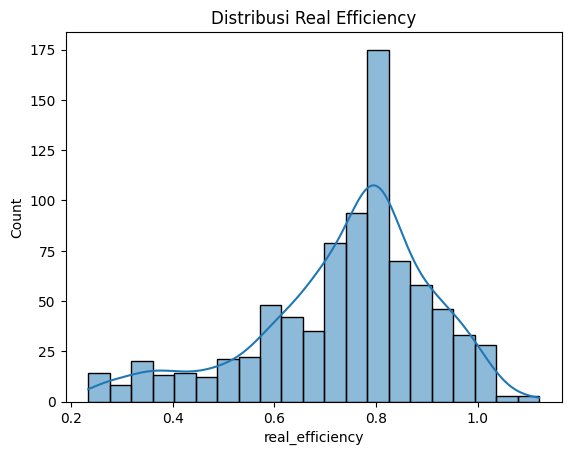

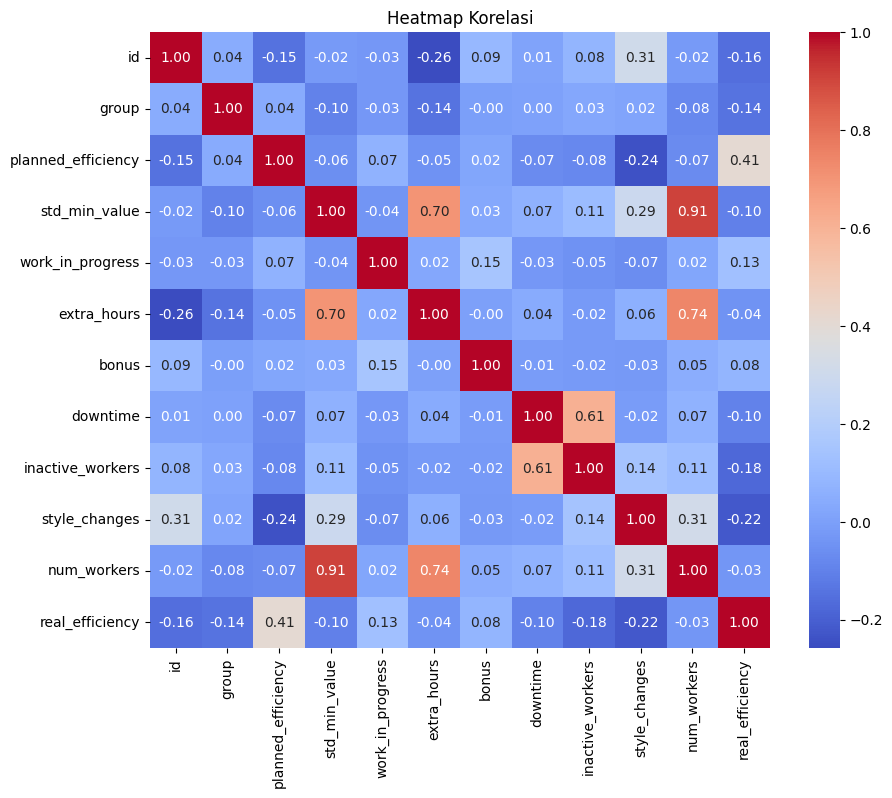

In [201]:
sns.histplot(train_data['real_efficiency'], kde=True)
plt.title('Distribusi Real Efficiency')
plt.show()

numeric_data = train_data.select_dtypes(include=['number'])
correlation = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi')
plt.show()

# Preprocess

In [202]:
def preprocess_data(train_df, test_df):
    X = train_df.drop('target', axis=1)
    y = train_df['target']
    
    X = X.fillna(X.median())
    test_df = test_df.fillna(X.median())
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_test_scaled = scaler.transform(test_df)
    
    return X_scaled, y, X_test_scaled

# Predicting

In [204]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RepeatedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression

def advanced_feature_engineering(df):
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df['month'] = df['timestamp'].dt.month
    df['day'] = df['timestamp'].dt.day
    df['day_of_week'] = df['timestamp'].dt.dayofweek
    df['quarter'] = df['timestamp'].dt.quarter
    df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)
    
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        if col not in ['id', 'timestamp', 'real_efficiency']:
            df[f'{col}_squared'] = df[col] ** 2
            df[f'{col}_log'] = np.log1p(df[col])
    
    return df

def preprocessing_strategy(train_data, test_data):
    X = train_data.drop(['id', 'timestamp', 'real_efficiency'], axis=1)
    y = train_data['real_efficiency']
    
    categorical_features = X.select_dtypes(include=['object', 'category']).columns
    numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', Pipeline([
                ('imputer', SimpleImputer(strategy='median')),
                ('poly', PolynomialFeatures(degree=2, include_bias=False)),
                ('scaler', StandardScaler())
            ]), numerical_features),
            
            ('cat', Pipeline([
                ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))
            ]), categorical_features)
        ])
    
    return X, y, preprocessor

def preprocess_and_model(train_data, test_data):
    train_data = advanced_feature_engineering(train_data)
    test_data = advanced_feature_engineering(test_data)
    
    X, y, preprocessor = preprocessing_strategy(train_data, test_data)
    
    models = {
        'Linear Regression': Pipeline([
            ('preprocessor', preprocessor),
            ('feature_selection', SelectKBest(f_regression, k=20)),
            ('regressor', LinearRegression())
        ]),
        'Lasso Regression': Pipeline([
            ('preprocessor', preprocessor),
            ('feature_selection', SelectKBest(f_regression, k=20)),
            ('regressor', Lasso(max_iter=50000))
        ]),
        'Ridge Regression': Pipeline([
            ('preprocessor', preprocessor),
            ('feature_selection', SelectKBest(f_regression, k=20)),
            ('regressor', Ridge())
        ])
    }
    
    results = {}
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    param_grid = {
        'Lasso Regression': {
            'regressor__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
            'feature_selection__k': [10, 15, 20, 25, 30]
        },
        'Ridge Regression': {
            'regressor__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
            'feature_selection__k': [10, 15, 20, 25, 30]
        }
    }
    
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
    
    for name, model in models.items():
        if name in ['Lasso Regression', 'Ridge Regression']:
            grid_search = GridSearchCV(model, param_grid[name], cv=cv, scoring='r2', n_jobs=-1)
            grid_search.fit(X_train, y_train)
            
            print(f"{name} - Best Parameters: {grid_search.best_params_}")
            
            model = grid_search.best_estimator_
        else:
            model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        
        results[name] = {
            'R-squared': r2,
            'MSE': mse,
            'MAE': mae,
            'Model': model
        }
        
        print(f"{name}:")
        print(f"R-squared: {r2}")
        print(f"Mean Squared Error: {mse}")
        print(f"Mean Absolute Error: {mae}\n")
    
    best_model_name = max(results, key=lambda k: results[k]['R-squared'])
    best_model = results[best_model_name]['Model']
    
    X_test_final = test_data.drop(['id', 'timestamp'], axis=1)
    
    y_test_pred = best_model.predict(X_test_final)
    
    submission_df = pd.DataFrame({
        'id': test_data['id'],
        'real_efficiency': y_test_pred
    })
    
    submission_df.to_csv('submission.csv', index=False)
    print(f"Submission file telah dibuat: submission.csv (Model Terbaik: {best_model_name})")
    
    return submission_df

train_data = pd.read_csv('efficiency_train.csv')
test_data = pd.read_csv('efficiency_test.csv')

submission = preprocess_and_model(train_data, test_data)

Linear Regression:
R-squared: 0.25061589343705737
Mean Squared Error: 0.021413649924603956
Mean Absolute Error: 0.09762610886341294

Lasso Regression - Best Parameters: {'feature_selection__k': 10, 'regressor__alpha': 0.0001}
Lasso Regression:
R-squared: 0.16397501049366237
Mean Squared Error: 0.023889413048294676
Mean Absolute Error: 0.10653661080356998

Ridge Regression - Best Parameters: {'feature_selection__k': 10, 'regressor__alpha': 10}
Ridge Regression:
R-squared: 0.16353591824601665
Mean Squared Error: 0.023901960108731832
Mean Absolute Error: 0.10641826152694718

Submission file telah dibuat: submission.csv (Model Terbaik: Linear Regression)
